In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from patsy import dmatrix
from datetime import datetime

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('../dataset/mlb_fa_list.csv')

print(df.shape)
df.tail()

(1200, 72)


,Name,Yr,Team,G,AB,PA,H_b,1B,2B,3B,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB%,K%,BB/K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC+,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR/9,BB/9,K/9,K/BB,K-BB%,GB%,HR/FB,LOB%,ERA,BABIP_p,FIP,WHIP,Contract Yrs,Total Salary($),Avg Salary($)
1195,Trevor Plouffe,2017,Athletics,100,283.0,313.0,56.0,40.0,7.0,0.0,9.0,31.0,19.0,28.0,2.0,88.0,8.9,28.1,0.32,0.251,1.0,1.0,0.0,12.0,1.0,2.0,-4.0,0.120,0.258,-16.6,0.198,0.272,0.318,0.590,-1.2,58.0,-3.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1196,Tyson Ross,2017,Rangers,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.2,0.0,-1.21,3.0,3.0,10.0,0.0,49.0,53.0,7.0,37.0,36.0,46.0,0.0,0.0,0.0,42.0,6.0,0.0,0.0,0.0,238.0,4.0,1.29,6.8,6.61,0.97,-0.4,46.8,13.0,58.0,7.71,0.303,6.18,1.84,1.0,6000000.0,6000000.0
1197,Welington Castillo,2017,Orioles,96,341.0,365.0,96.0,65.0,11.0,0.0,20.0,44.0,53.0,22.0,0.0,97.0,6.0,26.6,0.23,0.336,0.0,2.0,0.0,10.0,0.0,0.0,10.8,0.208,0.344,7.0,0.282,0.323,0.490,0.813,2.7,113.0,1.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1198,Wilson Ramos,2017,Rays,64,208.0,224.0,54.0,37.0,6.0,0.0,11.0,19.0,35.0,10.0,2.0,36.0,4.5,16.1,0.28,0.262,0.0,3.0,0.0,11.0,0.0,0.0,2.2,0.188,0.307,-2.7,0.260,0.290,0.447,0.737,0.4,92.0,-0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1199,Yoenis Cespedes,2017,Mets,81,291.0,321.0,85.0,49.0,17.0,2.0,17.0,46.0,42.0,26.0,5.0,61.0,8.1,19.0,0.43,0.316,2.0,2.0,0.0,7.0,0.0,1.0,-6.2,0.247,0.369,13.1,0.292,0.352,0.540,0.892,1.6,131.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


In [5]:
df.rename(columns={"wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs"}, inplace=True)
df.rename(columns={"BB%": "BB_Percent", "K%": "K_Percent", "K-BB%": "K_BB_Percent", "GB%": "GB_Percent",
                   "LOB%": "LOB_Percent"}, inplace=True)
df.rename(columns={"Avg Salary($)": "Salary", "Total Salary($)" : "Total_Salary"}, inplace=True)
df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples"}, inplace=True)
df.rename(columns={"BB/K" : "BB_per_K", "HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                   "HR/FB" : "HR_per_FB"}, inplace=True)

df.tail()

,Name,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
1195,Trevor Plouffe,2017,Athletics,100,283.0,313.0,56.0,40.0,7.0,0.0,9.0,31.0,19.0,28.0,2.0,88.0,8.9,28.1,0.32,0.251,1.0,1.0,0.0,12.0,1.0,2.0,-4.0,0.120,0.258,-16.6,0.198,0.272,0.318,0.590,-1.2,58.0,-3.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1196,Tyson Ross,2017,Rangers,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.2,0.0,-1.21,3.0,3.0,10.0,0.0,49.0,53.0,7.0,37.0,36.0,46.0,0.0,0.0,0.0,42.0,6.0,0.0,0.0,0.0,238.0,4.0,1.29,6.8,6.61,0.97,-0.4,46.8,13.0,58.0,7.71,0.303,6.18,1.84,1.0,6000000.0,6000000.0
1197,Welington Castillo,2017,Orioles,96,341.0,365.0,96.0,65.0,11.0,0.0,20.0,44.0,53.0,22.0,0.0,97.0,6.0,26.6,0.23,0.336,0.0,2.0,0.0,10.0,0.0,0.0,10.8,0.208,0.344,7.0,0.282,0.323,0.490,0.813,2.7,113.0,1.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1198,Wilson Ramos,2017,Rays,64,208.0,224.0,54.0,37.0,6.0,0.0,11.0,19.0,35.0,10.0,2.0,36.0,4.5,16.1,0.28,0.262,0.0,3.0,0.0,11.0,0.0,0.0,2.2,0.188,0.307,-2.7,0.260,0.290,0.447,0.737,0.4,92.0,-0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1199,Yoenis Cespedes,2017,Mets,81,291.0,321.0,85.0,49.0,17.0,2.0,17.0,46.0,42.0,26.0,5.0,61.0,8.1,19.0,0.43,0.316,2.0,2.0,0.0,7.0,0.0,1.0,-6.2,0.247,0.369,13.1,0.292,0.352,0.540,0.892,1.6,131.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


In [6]:
df.dtypes

Name             object
Yr                int64
Team             object
G                 int64
AB              float64
PA              float64
H_b             float64
Hits            float64
Doubles         float64
Triples         float64
HR_b            float64
R_b             float64
RBI             float64
BB_b            float64
IBB_b           float64
SO_b            float64
BB_Percent      float64
K_Percent       float64
BB_per_K        float64
BABIP_b         float64
HBP_b           float64
SF              float64
SH              float64
GDP             float64
SB              float64
CS              float64
Def             float64
ISO             float64
wOBA            float64
wRAA            float64
AVG             float64
OBP             float64
SLG             float64
OPS             float64
WAR             float64
wRC_Plus        float64
WPA             float64
W               float64
L               float64
GS              float64
CG              float64
IP              

In [7]:
## 각 변수별 기초통계량 확인

df.describe()

,Yr,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1.200000e+03
mean,2011.469167,75.087500,178.097500,199.583333,46.391667,30.773333,9.291667,0.773333,5.553333,22.927500,22.936667,17.063333,1.241667,35.730833,4.324250,10.040917,0.257933,0.153008,1.914167,1.509167,0.964167,4.212500,2.413333,0.961667,-0.715583,0.076445,0.164789,0.720417,0.132478,0.167763,0.208903,0.376678,0.944750,48.338333,0.072567,2.464167,2.472500,4.700833,0.115833,42.366083,42.372500,4.908333,14.151667,33.663333,21.016667,1.758333,0.706667,0.115833,19.377500,1.576667,2.545833,1.210000,0.046667,181.235833,1.430833,0.522058,1.608575,3.611217,1.277567,5.284250,21.555083,5.333583,35.744167,2.084342,0.145095,2.074100,0.670958,1.690000,1.339037e+07,4.928296e+06
std,3.417423,44.203429,205.199591,230.022416,55.977878,37.524664,11.700029,1.625574,8.548570,28.876642,29.511101,22.692476,2.871434,43.667025,4.763929,10.898781,0.306585,0.147992,3.212538,2.215251,2.151373,5.650571,6.336083,2.015419,6.007365,0.085505,0.160314,9.382646,0.128871,0.162577,0.207259,0.368059,1.448311,50.981792,1.425022,3.974739,3.788738,10.173048,0.575348,60.767485,62.057108,7.546460,20.157354,48.226806,30.875678,6.795961,1.563967,0.413391,28.478984,2.744765,5.688866,1.999808,0.279083,258.364995,2.434506,0.675729,1.884800,3.969940,1.664418,7.037507,22.818578,6.609057,36.894076,2.413092,0.150848,2.258178,0.711700,1.294332,2.956699e+07,5.042442e+06
min,2006.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.600000,0.000000,0.000000,-29.700000,0.000000,0.000000,0.000000,0.000000,-2.400000,-1.000000,-4.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.800000e+05,3.800000e+05
25%,2009.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,0.000000,0.000000,-1.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.500000e+06,1.500000e+06
50%,2011.000000,67.000000,87.500000,97.500000,21.000000,13.000000,3.000000,0.000000,0.000000,8.000000,7.000000,4.500000,0.000

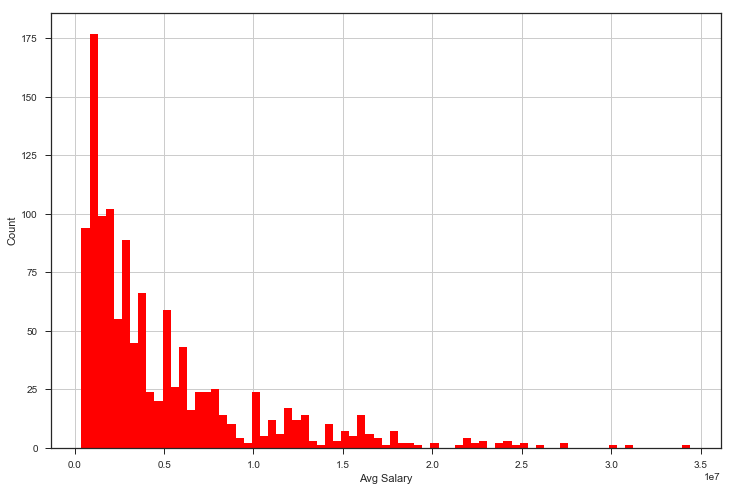

In [35]:
plt.figure(figsize=(12, 8))
plt.hist(df['Salary'], bins=75, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

In [36]:
## FA 계약이 체결된 선수들에 대한 연도별 인원 파악

df.groupby('Yr').count()['Name']

Yr
0     111
1      81
2      98
3     107
4     116
5      96
6      76
7     115
8     113
9      98
10    105
11     84
Name: Name, dtype: int64

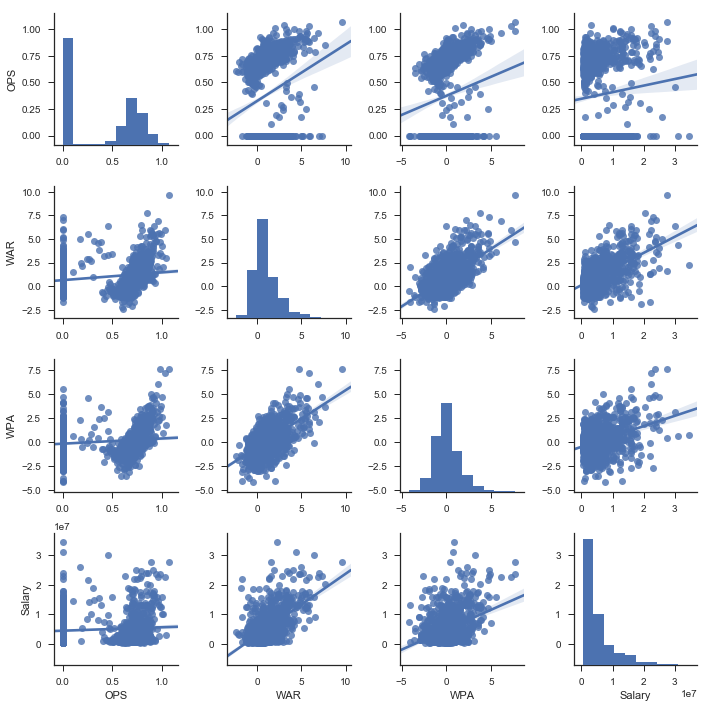

In [37]:
## 연봉(Salary)과 선수로서의 주요 지표들 간 관계를 pairplot을 통해 확인

cols = ["OPS", "WAR", "WPA", "Salary"]
sns.set(style="ticks")
g = sns.pairplot(df[cols], kind="reg")

# cols = ["WAR", "wRC_Plus", "WPA", "Salary"]
# sns.pairplot(df[cols])
# plt.show()

In [38]:
## Encoding Two Categorical Columns

def encode_df_x1(df):
    
    ## categorical variables of Yr
    df_yr_le = LabelEncoder()
    df['Yr'] = df_yr_le.fit_transform(df['Yr'])
    
    enc_dict_yr = {'Yr' : df_yr_le}
    
    return df, enc_dict_yr
    
def encode_df_x2(df):
    
    ## categorical variables of Team
    df_team_le = LabelEncoder()
    df['Team'] = df_team_le.fit_transform(df['Team'])
    
    enc_dict_team = {'Team' : df_team_le}
    
    return df, enc_dict_team

train_df_x1 = encode_df_x1(df)
train_df_x2 = encode_df_x2(df)

In [39]:
print(df.head(), '\n\n')
print(df.tail())

           Name  Yr  Team    G     AB     PA    H_b  Hits  Doubles  Triples  \
0   Aaron Boone   0    11  104  354.0  392.0   89.0  62.0     19.0      1.0   
1   Aaron Fultz   0    18   66    0.0    0.0    0.0   0.0      0.0      0.0   
2    Adam Eaton   0    20   13    0.0    0.0    0.0   0.0      0.0      0.0   
3  Adam Kennedy   0     0  139  451.0  503.0  123.0  87.0     26.0      6.0   
4   Alan Embree   0    17   73    0.0    0.0    0.0   0.0      0.0      0.0   

   HR_b   R_b   RBI  BB_b  IBB_b  SO_b  BB_Percent  K_Percent  BB_per_K  \
0   7.0  50.0  46.0  27.0    1.0  62.0         6.9       15.8      0.44   
1   0.0   0.0   0.0   0.0    0.0   0.0         0.0        0.0      0.00   
2   0.0   0.0   0.0   0.0    0.0   0.0         0.0        0.0      0.00   
3   4.0  50.0  55.0  39.0    5.0  72.0         7.8       14.3      0.54   
4   0.0   0.0   0.0   0.0    0.0   0.0         0.0        0.0      0.00   

   BABIP_b  HBP_b   SF   SH   GDP    SB    CS   Def    ISO   wOBA  wRAA  \

## * Splitting Dependent & Independent Variables

In [40]:
df_x = df.iloc[:, 1:71]

In [41]:
print(df_x.shape)
df_x.tail()

(1200, 70)


,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary
1195,11,2,100,283.0,313.0,56.0,40.0,7.0,0.0,9.0,31.0,19.0,28.0,2.0,88.0,8.9,28.1,0.32,0.251,1.0,1.0,0.0,12.0,1.0,2.0,-4.0,0.120,0.258,-16.6,0.198,0.272,0.318,0.590,-1.2,58.0,-3.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0
1196,11,20,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.2,0.0,-1.21,3.0,3.0,10.0,0.0,49.0,53.0,7.0,37.0,36.0,46.0,0.0,0.0,0.0,42.0,6.0,0.0,0.0,0.0,238.0,4.0,1.29,6.8,6.61,0.97,-0.4,46.8,13.0,58.0,7.71,0.303,6.18,1.84,1.0,6000000.0
1197,11,16,96,341.0,365.0,96.0,65.0,11.0,0.0,20.0,44.0,53.0,22.0,0.0,97.0,6.0,26.6,0.23,0.336,0.0,2.0,0.0,10.0,0.0,0.0,10.8,0.208,0.344,7.0,0.282,0.323,0.490,0.813,2.7,113.0,1.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0
1198,11,21,64,208.0,224.0,54.0,37.0,6.0,0.0,11.0,19.0,35.0,10.0,2.0,36.0,4.5,16.1,0.28,0.262,0.0,3.0,0.0,11.0,0.0,0.0,2.2,0.188,0.307,-2.7,0.260,0.290,0.447,0.737,0.4,92.0,-0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0
1199,11,14,81,291.0,321.0,85.0,49.0,17.0,2.0,17.0,46.0,42.0,26.0,5.0,61.0,8.1,19.0,0.43,0.316,2.0,2.0,0.0,7.0,0.0,1.0,-6.2,0.247,0.369,13.1,0.292,0.352,0.540,0.892,1.6,131.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0


In [42]:
df_y = pd.DataFrame(df['Salary'])

print(df_y.shape)
df_y.tail()

(1200, 1)


,Salary
1195,5250000.0
1196,6000000.0
1197,6500000.0
1198,6250000.0
1199,27500000.0


In [43]:
df_x_corr = df_x.corr()

df_x_corr.tail()

,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary
BABIP_p,0.084762,0.044343,-0.755231,-0.824738,-0.824156,-0.791927,-0.782341,-0.760038,-0.455999,-0.624621,-0.758976,-0.744442,-0.720702,-0.416276,-0.769929,-0.853850,-0.791931,-0.797604,-0.944912,-0.571686,-0.652944,-0.310224,-0.711897,-0.365713,-0.459340,0.160529,-0.846914,-0.955209,-0.073525,-0.950620,-0.956704,-0.940379,-0.952162,-0.081615,-0.903978,-0.060472,0.602155,0.661628,0.464521,0.199948,0.687960,0.691606,0.645654,0.697329,0.686171,0.692683,0.240250,0.439533,0.280021,0.692761,0.574568,0.421493,0.602975,0.165119,0.696534,0.587916,0.783484,0.875439,0.910847,0.751430,0.729326,0.953806,0.820271,0.958044,0.916378,1.000000,0.931389,0.983439,-0.058674,-0.046201
FIP,0.068129,0.043856,-0.761818,-0.788015,-0.787531,-0.756373,-0.747373,-0.725630,-0.434947,-0.596395,-0.724815,-0.710861,-0.688516,-0.397502,-0.736548,-0.817404,-0.763543,-0.762772,-0.904954,-0.545708,-0.623381,-0.306334,-0.679642,-0.349333,-0.438624,0.151269,-0.808111,-0.913416,-0.070277,-0.909223,-0.915261,-0.898631,-0.910348,-0.179361,-0.863594,-0.132300,0.551183,0.637100,0.460915,0.159701,0.640520,0.653094,0.683979,0.686431,0.604303,0.680499,0.142067,0.359656,0.273266,0.681546,0.562034,0.344710,0.563361,0.127377,0.653517,0.550141,0.916871,0.886625,0.812995,0.619184,0.573149,0.896721,0.911018,0.911545,0.948803,0.931389,1.000000,0.966159,-0.095168,-0.078932
WHIP,0.067266,0.046963,-0.761742,-0.808909,-0.808378,-0.776473,-0.767196,-0.745018,-0.446830,-0.612204,-0.744086,-0.729757,-0.706651,-0.408006,-0.755781,-0.838588,-0.782315,-0.782776,-0.929024,-0.560330,-0.639984,-0.311804,-0.697814,-0.358558,-0.450215,0.155028,-0.830228,-0.937981,-0.072114,-0.933730,-0.939738,-0.922994,-0.934878,-0.139674,-0.886678,-0.111184,0.556342,0.638151,0.445755,0.168011,0.646750,0.659869,0.633996,0.692267,0.627340,0.676004,0.186745,0.402477,0.272246,0.676026,0.556466,0.386572,0.592325,0.135824,0.659946,0.570504,0.820751,0.922044,0.863037,0.655807,0.621156,0.934553,0.841937,0.931060,0.953200,0.983439,0.966159,1.000000,-0.089275,-0.073829
Contract_Yrs,0.034417,0.016372,0.224135,0.244450,0.249128,0.275758,0.252198,0.267468,0.180629,0.298257,0.304170,0.287312,0.257650,0.336363,0.181399,0.094347,0.037450,0.149774,0.099413,0.198588,0.231950,0.052616,0.219297,0.239577,0.199742,-0.009299,0.139134,0.115882,0.369707,0.117522,0.110711,0.130506,0.122385,0.526262,0.158999,0.385171,0.146500,0.051664,0.126030,0.205054,0.117276,0.087985,0.069667,0.065674,0.160559,0.062739,0.065717,-0.012822,0.079636,0.063521,0.062804,-0.037826,-0.046360,0.176306,0.107390,0.038450,-0.074089,-0.097585,0.001221,0.077829,0.080093,-0.042517,-0.051080,-0.035342,-0.101967,-0.058674,-0.095168,-0.089275,1.000000,0.915891
Total_Salary,0.077626,0.019417,0.188481,0.232912,0.239794,0.259019,0.226622,0.253848,0.134356,0.328357,0.301174,0.294559,0.270034,0.378139,0.193326,0.108989,0.062022,0.142893,0.094972,0.211608,0.222341,0.015743,0.224774,0.207754,0.145603,-0.048579,0.154021,0.115870,0.393138,0.110599,0.109575,0.132369,0.122941,0.544172,0.161415,0.395888,0.180105,0.082744,0.177983,0.258854,0.150863,0.124495,0.108801,0.084850,0.195428,0.099926,0.033068,-0.060167,0.074794,0.101405,0.077127,-0.108642,-0.051518,0.224707,0.140771,0.061478,-0.055371,-0.094350,-0.004467,0.079933,0.068114,-0.038793,-0.040458,-0.033883,-0.077239,-0.046201,-0.078932,-0.073829,0.915891,1.000000


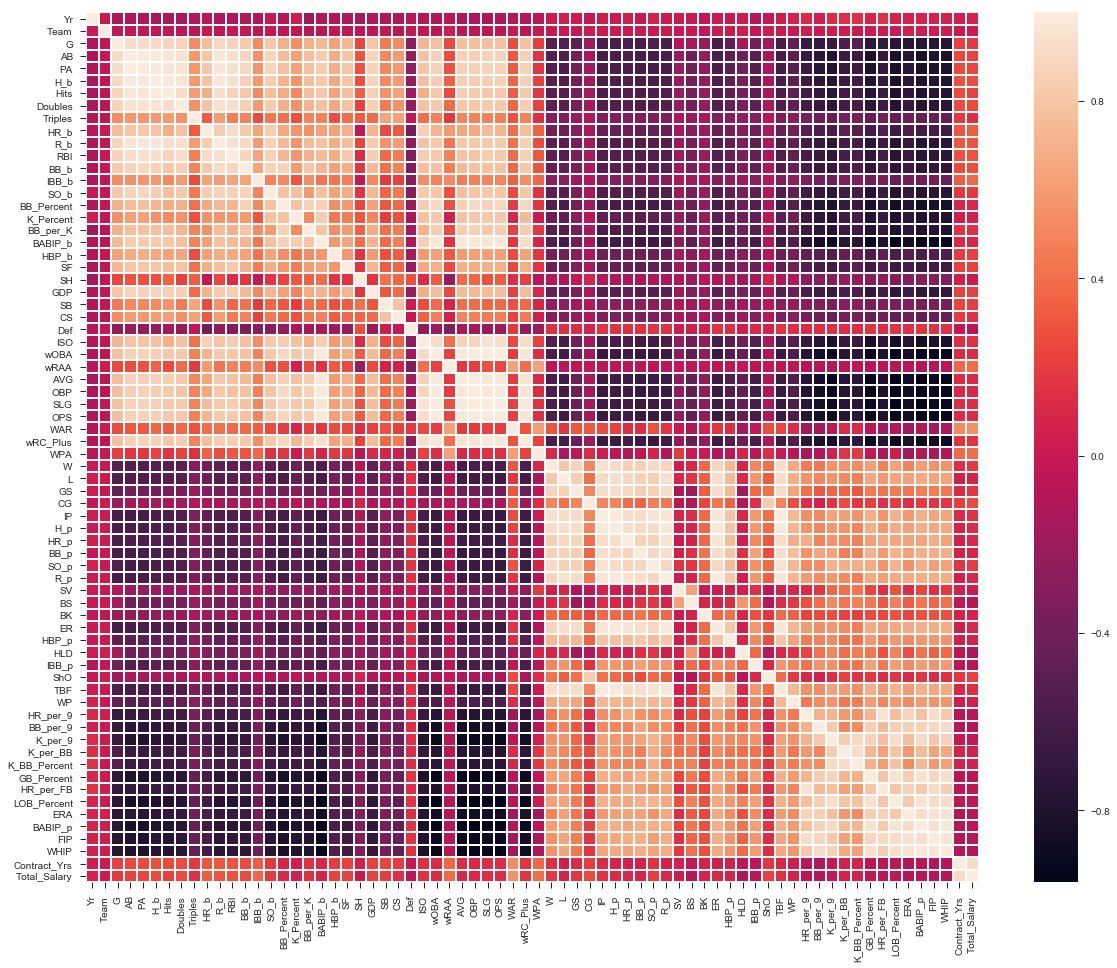

In [44]:
plt.figure(figsize=(20, 16))
corr_data = pd.DataFrame.corr(df_x)
sns.heatmap(corr_data, annot=False, linewidths=1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


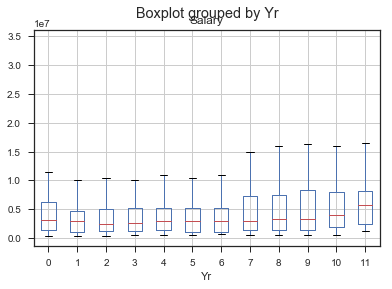

In [45]:
plt.figure(figsize=(16, 12))
df.boxplot("Salary", "Yr")
plt.show()

## * Checking p-value using OLS Analysis

### * 1st OLS analysis

In [46]:
dfX1 = sm.add_constant(df_x)
dfY = pd.DataFrame(df_y, columns=["Salary"])
df_mlb = pd.concat([dfX1, dfY], axis=1)

In [47]:
model1 = sm.OLS(dfY, dfX1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     85.13
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        04:40:04   Log-Likelihood:                -19128.
No. Observations:                1200   AIC:                         3.840e+04
Df Residuals:                    1130   BIC:                         3.875e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.647e+06   9.92e+05     -1.659   

## * Scaling the variables

In [48]:
cols = df_x.columns.tolist()

cat_cols = cols[:2]
num_cols = cols[2:70]

cat_cols_list = []
num_cols_list = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols:
        cat_cols_list.append("C(" + item1 + ")")
        
    for item2 in num_cols:
        num_cols_list.append("scale(" + item2 + ")")
        
    return cat_cols_list, num_cols_list

converted_cols = r_style_cat_cols(cat_cols, num_cols)

converted_cols_list = " + ".join(cat_cols_list + num_cols_list)
model_str = "Salary ~ "

## zero; To eliminate Intercept of Scaling categorical valiable.
zero = ' + 0'

ols_str_list = model_str + converted_cols_list + zero
merging_converted_cols = cat_cols_list + num_cols_list

# print(ols_str_list)
# print(converted_cols_list)
# print(converted_cols)

### * 2nd OLS analysis (Not include 'ZERO')

In [49]:
dfX2 = dmatrix(converted_cols_list, data=df_x)
dfX2_columns = dfX2.design_info.column_names
dfX2 = pd.DataFrame(dfX2, columns=dfX2_columns)

In [50]:
model2 = sm.OLS(dfY, dfX2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     58.35
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        04:40:07   Log-Likelihood:                -19079.
No. Observations:                1200   AIC:                         3.837e+04
Df Residuals:                    1092   BIC:                         3.892e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.304e+06   4

### * 3-1 OLS analysis

## * 1st Pre-processing Variables of model2 that failed the 1% P-VALUE Condition test

In [51]:
def extracted_pvals(result, cond):
    pvals = pd.DataFrame(result.pvalues)
    pvals.columns = ['P_values']
    pvals['P_values'] = pvals[pvals.P_values < cond]
    pvals = pvals.dropna().sort_values('P_values')
    
    return pvals

In [52]:
p_values3 = extracted_pvals(result2, 0.01)
# print(len(p_values))
# print(p_values)

extracted_features3 = list(p_values3.index.values)
extracted_df_x3 = dfX2.loc[:, extracted_features3]

extracted_df_x3.tail()

,scale(Total_Salary),Intercept,scale(SV),scale(G),scale(Hits),scale(H_b),C(Yr)[T.11],scale(HLD),scale(Doubles),scale(HR_b),scale(wRAA),scale(R_b),scale(ShO),scale(wOBA),C(Team)[T.17]
1195,-0.275434,1.0,-0.25884,0.563822,0.245985,0.171717,1.0,-0.447698,-0.195950,0.403354,-1.846775,0.279668,-0.167284,0.581669,0.0
1196,-0.250058,1.0,-0.25884,-1.427803,-0.820425,-0.829096,1.0,-0.447698,-0.794489,-0.649892,-0.076814,-0.794312,-0.167284,-1.028343,0.0
1197,-0.013208,1.0,-0.25884,0.473294,0.912492,0.886583,1.0,-0.447698,0.146072,1.690656,0.669555,0.730046,-0.167284,1.118339,0.0
1198,-0.030126,1.0,-0.25884,-0.250934,0.166004,0.135973,1.0,-0.447698,-0.281456,0.637409,-0.364699,-0.136066,-0.167284,0.887446,0.0
1199,3.268846,1.0,-0.25884,0.133812,0.485927,0.689995,1.0,-0.447698,0.659105,1.339574,1.319963,0.799335,-0.167284,1.274348,0.0


In [53]:
dfX3_1 = sm.add_constant(extracted_df_x3)

model3_1 = sm.OLS(dfY, dfX3_1)
result3_1 = model3_1.fit()
print(result3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     271.0
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        04:40:10   Log-Likelihood:                -19361.
No. Observations:                1200   AIC:                         3.875e+04
Df Residuals:                    1185   BIC:                         3.883e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
scale(Total_Salary)   3.81e+06   8

## * 2nd Pre-processing Variables of model3-1 that failed the 1% P-VALUE Condition test

In [54]:
p_values3_1 = extracted_pvals(result3_1, 0.01)

extracted_features3_1 = p_values3_1.index.values
extracted_df_x3_1 = dfX3_1.loc[:, extracted_features3_1]

dfX3_1_1 = sm.add_constant(extracted_df_x3_1)

model3_1_1 = sm.OLS(dfY, dfX3_1_1)
result3_1_1 = model3_1_1.fit()
print(result3_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     608.6
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        04:40:12   Log-Likelihood:                -19381.
No. Observations:                1200   AIC:                         3.878e+04
Df Residuals:                    1193   BIC:                         3.881e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.812e+06   7

### * 2-2 OLS analysis (Include 'ZERO')

In [55]:
ols_str_list

'Salary ~ C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + scale(Contract_Yrs) + scale(

In [56]:
model2_2 = sm.OLS.from_formula(ols_str_list, df)
result2_2 = model2_2.fit()
print(result2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     58.35
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        04:40:14   Log-Likelihood:                -19079.
No. Observations:                1200   AIC:                         3.837e+04
Df Residuals:                    1092   BIC:                         3.892e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]             5.304e+06   4

### * 3-2 OLS analysis

## * 1st Pre-processing Variables of model2-2 that failed the 1% P-VALUE Condition test

In [57]:
df_x_copy = df_x.copy()
df_x_copy_list = list(df_x_copy.columns)
df_x_conv_list = cat_cols_list + num_cols_list

for item, item2 in zip(df_x_copy_list, df_x_conv_list):
    df_x_copy.rename(columns={item : item2}, inplace=True)
        
df_x_copy.tail()

,C(Yr),C(Team),scale(G),scale(AB),scale(PA),scale(H_b),scale(Hits),scale(Doubles),scale(Triples),scale(HR_b),scale(R_b),scale(RBI),scale(BB_b),scale(IBB_b),scale(SO_b),scale(BB_Percent),scale(K_Percent),scale(BB_per_K),scale(BABIP_b),scale(HBP_b),scale(SF),scale(SH),scale(GDP),scale(SB),scale(CS),scale(Def),scale(ISO),scale(wOBA),scale(wRAA),scale(AVG),scale(OBP),scale(SLG),scale(OPS),scale(WAR),scale(wRC_Plus),scale(WPA),scale(W),scale(L),scale(GS),scale(CG),scale(IP),scale(H_p),scale(HR_p),scale(BB_p),scale(SO_p),scale(R_p),scale(SV),scale(BS),scale(BK),scale(ER),scale(HBP_p),scale(HLD),scale(IBB_p),scale(ShO),scale(TBF),scale(WP),scale(HR_per_9),scale(BB_per_9),scale(K_per_9),scale(K_per_BB),scale(K_BB_Percent),scale(GB_Percent),scale(HR_per_FB),scale(LOB_Percent),scale(ERA),scale(BABIP_p),scale(FIP),scale(WHIP),scale(Contract_Yrs),scale(Total_Salary)
1195,11,2,100,283.0,313.0,56.0,40.0,7.0,0.0,9.0,31.0,19.0,28.0,2.0,88.0,8.9,28.1,0.32,0.251,1.0,1.0,0.0,12.0,1.0,2.0,-4.0,0.120,0.258,-16.6,0.198,0.272,0.318,0.590,-1.2,58.0,-3.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0
1196,11,20,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.2,0.0,-1.21,3.0,3.0,10.0,0.0,49.0,53.0,7.0,37.0,36.0,46.0,0.0,0.0,0.0,42.0,6.0,0.0,0.0,0.0,238.0,4.0,1.29,6.8,6.61,0.97,-0.4,46.8,13.0,58.0,7.71,0.303,6.18,1.84,1.0,6000000.0
1197,11,16,96,341.0,365.0,96.0,65.0,11.0,0.0,20.0,44.0,53.0,22.0,0.0,97.0,6.0,26.6,0.23,0.336,0.0,2.0,0.0,10.0,0.0,0.0,10.8,0.208,0.344,7.0,0.282,0.323,0.490,0.813,2.7,113.0,1.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0
1198,11,21,64,208.0,224.0,54.0,37.0,6.0,0.0,11.0,19.0,35.0,10.0,2.0,36.0,4.5,16.1,0.28,0.262,0.0,3.0,0.0,11.0,0.0,0.0,2.2,0.188,0.307,-2.7,0.260,0.290,0.447,0.737,0.4,92.0,-0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0
1199,11,14,81,291.0,321.0,85.0,49.0,17.0,2.0,17.0,46.0,42.0,26.0,5.0,61.0,8.1,19.0,0.43,0.316,2.0,2.0,0.0,7.0,0.0,1.0,-6.2,0.247,0.369,13.1,0.292,0.352,0.540,0.892,1.6,131.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0


In [58]:
ols_model_2_2_join = " + ".join(df_x_copy.columns)
ols_model_2_2_list = ols_model_2_2_join + zero
ols_model_2_2_list

'C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + scale(Contract_Yrs) + scale(Total_Sal

In [59]:
dfX3_2 = dmatrix(ols_model_2_2_list, data=df_x)
dfX3_2_columns = dfX3_2.design_info.column_names
dfX3_2 = pd.DataFrame(dfX3_2, columns=dfX3_2_columns)

In [60]:
dfX3_2_columns

['C(Yr)[0]',
 'C(Yr)[1]',
 'C(Yr)[2]',
 'C(Yr)[3]',
 'C(Yr)[4]',
 'C(Yr)[5]',
 'C(Yr)[6]',
 'C(Yr)[7]',
 'C(Yr)[8]',
 'C(Yr)[9]',
 'C(Yr)[10]',
 'C(Yr)[11]',
 'C(Team)[T.1]',
 'C(Team)[T.2]',
 'C(Team)[T.3]',
 'C(Team)[T.4]',
 'C(Team)[T.5]',
 'C(Team)[T.6]',
 'C(Team)[T.7]',
 'C(Team)[T.8]',
 'C(Team)[T.9]',
 'C(Team)[T.10]',
 'C(Team)[T.11]',
 'C(Team)[T.12]',
 'C(Team)[T.13]',
 'C(Team)[T.14]',
 'C(Team)[T.15]',
 'C(Team)[T.16]',
 'C(Team)[T.17]',
 'C(Team)[T.18]',
 'C(Team)[T.19]',
 'C(Team)[T.20]',
 'C(Team)[T.21]',
 'C(Team)[T.22]',
 'C(Team)[T.23]',
 'C(Team)[T.24]',
 'C(Team)[T.25]',
 'C(Team)[T.26]',
 'C(Team)[T.27]',
 'C(Team)[T.28]',
 'C(Team)[T.29]',
 'scale(G)',
 'scale(AB)',
 'scale(PA)',
 'scale(H_b)',
 'scale(Hits)',
 'scale(Doubles)',
 'scale(Triples)',
 'scale(HR_b)',
 'scale(R_b)',
 'scale(RBI)',
 'scale(BB_b)',
 'scale(IBB_b)',
 'scale(SO_b)',
 'scale(BB_Percent)',
 'scale(K_Percent)',
 'scale(BB_per_K)',
 'scale(BABIP_b)',
 'scale(HBP_b)',
 'scale(SF)',
 'scale(SH)

In [61]:
p_values3_2 = extracted_pvals(result2_2, 0.01)
# # print(len(p_values3_2))
# print(p_values3_2)

extracted_features3_2 = list(p_values3_2.index.values)
extracted_df_x3_2 = dfX3_2.loc[:, extracted_features3_2]

# extracted_df_x3_2.tail()
extracted_features3_2

['scale(Total_Salary)',
 'C(Yr)[11]',
 'C(Yr)[10]',
 'C(Yr)[9]',
 'C(Yr)[7]',
 'C(Yr)[0]',
 'C(Yr)[1]',
 'C(Yr)[8]',
 'C(Yr)[2]',
 'C(Yr)[4]',
 'C(Yr)[3]',
 'C(Yr)[5]',
 'C(Yr)[6]',
 'scale(SV)',
 'scale(G)',
 'scale(Hits)',
 'scale(H_b)',
 'scale(HLD)',
 'scale(Doubles)',
 'scale(HR_b)',
 'scale(wRAA)',
 'scale(R_b)',
 'scale(ShO)',
 'scale(wOBA)',
 'C(Team)[T.17]']

In [62]:
dfX3_2 = sm.add_constant(extracted_df_x3_2)
dfX3_2.tail()

,const,scale(Total_Salary),C(Yr)[11],C(Yr)[10],C(Yr)[9],C(Yr)[7],C(Yr)[0],C(Yr)[1],C(Yr)[8],C(Yr)[2],C(Yr)[4],C(Yr)[3],C(Yr)[5],C(Yr)[6],scale(SV),scale(G),scale(Hits),scale(H_b),scale(HLD),scale(Doubles),scale(HR_b),scale(wRAA),scale(R_b),scale(ShO),scale(wOBA),C(Team)[T.17]
1195,1.0,-0.275434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25884,0.563822,0.245985,0.171717,-0.447698,-0.195950,0.403354,-1.846775,0.279668,-0.167284,0.581669,0.0
1196,1.0,-0.250058,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25884,-1.427803,-0.820425,-0.829096,-0.447698,-0.794489,-0.649892,-0.076814,-0.794312,-0.167284,-1.028343,0.0
1197,1.0,-0.013208,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25884,0.473294,0.912492,0.886583,-0.447698,0.146072,1.690656,0.669555,0.730046,-0.167284,1.118339,0.0
1198,1.0,-0.030126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25884,-0.250934,0.166004,0.135973,-0.447698,-0.281456,0.637409,-0.364699,-0.136066,-0.167284,0.887446,0.0
1199,1.0,3.268846,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25884,0.133812,0.485927,0.689995,-0.447698,0.659105,1.339574,1.319963,0.799335,-0.167284,1.274348,0.0


In [63]:
model3_2 = sm.OLS(dfY, dfX3_2)
result3_2 = model3_2.fit()
print(result3_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     162.3
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        04:40:20   Log-Likelihood:                -19345.
No. Observations:                1200   AIC:                         3.874e+04
Df Residuals:                    1175   BIC:                         3.887e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.573e+06   6

## * 2nd Pre-processing Variables of model3-2 that failed the 1% P-VALUE Condition test

In [64]:
p_values3_2_2 = extracted_pvals(result3_2, 0.01)
extracted_features3_2_2 = list(p_values3_2_2.index.values)
extracted_df_x3_2_2 = dfX3_2.loc[:, extracted_features3_2_2]

extracted_df_x3_2_2.tail()

,const,scale(Total_Salary),scale(wOBA),C(Yr)[11],scale(SV),scale(R_b),C(Yr)[10],scale(ShO),C(Yr)[7],C(Yr)[9],C(Yr)[8]
1195,1.0,-0.275434,0.581669,1.0,-0.25884,0.279668,0.0,-0.167284,0.0,0.0,0.0
1196,1.0,-0.250058,-1.028343,1.0,-0.25884,-0.794312,0.0,-0.167284,0.0,0.0,0.0
1197,1.0,-0.013208,1.118339,1.0,-0.25884,0.730046,0.0,-0.167284,0.0,0.0,0.0
1198,1.0,-0.030126,0.887446,1.0,-0.25884,-0.136066,0.0,-0.167284,0.0,0.0,0.0
1199,1.0,3.268846,1.274348,1.0,-0.25884,0.799335,0.0,-0.167284,0.0,0.0,0.0


In [65]:
dfX3_2_2 = sm.add_constant(extracted_df_x3_2_2)

model3_2_2 = sm.OLS(dfY, dfX3_2_2)
result3_2_2 = model3_2_2.fit()
print(result3_2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     377.0
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        04:40:23   Log-Likelihood:                -19365.
No. Observations:                1200   AIC:                         3.875e+04
Df Residuals:                    1189   BIC:                         3.881e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.472e+06   9

## * Eliminating Outliers

In [66]:
def elim_outliers(result):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX3_2_2.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [67]:
idx = elim_outliers(result3_2_2)
print(idx, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx)))

[   7    8   11   45  115  116  117  159  210  224  256  260  342  414  421
  425  449  475  516  593  613  667  689  692  708  709  719  728  746  752
  757  763  775  784  796  799  800  809  811  822  832  835  838  875  892
  902  905  916  919  929  951  957  959  960  972  990 1009 1031 1044 1055
 1061 1074 1077 1083 1103 1113 1115 1122 1124 1132 1133 1139 1149 1151 1167
 1180 1187 1189 1199] 

There are '79' Outliers according to Fox criteria


In [68]:
dfX3_2_2_idx = dfX3_2_2.drop(idx)
dfY_idx = dfY.drop(idx)

In [69]:
print(dfX3_2_2_idx.shape, dfY_idx.shape)

(1121, 11) (1121, 1)


### * 4th OLS analysis

In [70]:
dfX4_idx_elimVer = sm.add_constant(dfX3_2_2_idx)
model4_idx_elimVer = sm.OLS(dfY_idx, dfX4_idx_elimVer)
result4_idx_elimVer = model4_idx_elimVer.fit()
print(result4_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     514.8
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        04:40:28   Log-Likelihood:                -17629.
No. Observations:                1121   AIC:                         3.528e+04
Df Residuals:                    1110   BIC:                         3.533e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.632e+06   6

## * Pre-processing Variables of model4 that failed the 1% P-VALUE Condition test

In [71]:
p_values4 = extracted_pvals(result4_idx_elimVer, 0.01)
extracted_features4 = p_values4.index.values
extracted_df_x4 = dfX4_idx_elimVer.loc[:, extracted_features4]
extracted_df_x4.tail()

,const,scale(Total_Salary),scale(R_b),scale(wOBA),scale(SV),C(Yr)[11],scale(ShO)
1194,1.0,-0.393859,-0.794312,-1.028343,-0.25884,1.0,-0.167284
1195,1.0,-0.275434,0.279668,0.581669,-0.25884,1.0,-0.167284
1196,1.0,-0.250058,-0.794312,-1.028343,-0.25884,1.0,-0.167284
1197,1.0,-0.013208,0.730046,1.118339,-0.25884,1.0,-0.167284
1198,1.0,-0.030126,-0.136066,0.887446,-0.25884,1.0,-0.167284


In [72]:
dfX4_idx_elimVer = sm.add_constant(extracted_df_x4)
model4_idx_elimVer_filt = sm.OLS(dfY_idx, dfX4_idx_elimVer)
result4_idx_elimVer_filt = model4_idx_elimVer_filt.fit()
print(result4_idx_elimVer_filt.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     854.0
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        04:40:29   Log-Likelihood:                -17632.
No. Observations:                1121   AIC:                         3.528e+04
Df Residuals:                    1114   BIC:                         3.531e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.736e+06   5

## * Trying to another OLS Modeling

### 1. Numeric Variables ONLY

In [73]:
converted_num_ols = " + ".join(num_cols_list)

num_ols_model = model_str + converted_num_ols
num_ols_model

'Salary ~ scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + scale(Contract_Yrs) + scale(Total_Salary)'

### * 5th OLS analysis

In [74]:
model5 = sm.OLS.from_formula(num_ols_model, df)
result5 = model5.fit()
print(result5.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     85.29
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        04:40:41   Log-Likelihood:                -19142.
No. Observations:                1200   AIC:                         3.842e+04
Df Residuals:                    1132   BIC:                         3.877e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.928e+06   6

### * 1st Filtrating P-VALUE under 1% of 5th OLS model

In [75]:
dfX5 = dmatrix(converted_num_ols, data=df_x)
dfX_columns5 = dfX5.design_info.column_names
dfX5 = pd.DataFrame(dfX5, columns=dfX_columns5)

In [76]:
p_values5 = extracted_pvals(result5, 0.01)

extracted_features5 = list(p_values5.index.values)
extracted_df_x5 = dfX5.loc[:, extracted_features5]

print(extracted_df_x5.shape)
extracted_df_x5.tail()

(1200, 13)


,Intercept,scale(Total_Salary),scale(SV),scale(G),scale(wOBA),scale(H_b),scale(Hits),scale(Doubles),scale(HLD),scale(HR_b),scale(wRAA),scale(R_b),scale(ShO)
1195,1.0,-0.275434,-0.25884,0.563822,0.581669,0.171717,0.245985,-0.195950,-0.447698,0.403354,-1.846775,0.279668,-0.167284
1196,1.0,-0.250058,-0.25884,-1.427803,-1.028343,-0.829096,-0.820425,-0.794489,-0.447698,-0.649892,-0.076814,-0.794312,-0.167284
1197,1.0,-0.013208,-0.25884,0.473294,1.118339,0.886583,0.912492,0.146072,-0.447698,1.690656,0.669555,0.730046,-0.167284
1198,1.0,-0.030126,-0.25884,-0.250934,0.887446,0.135973,0.166004,-0.281456,-0.447698,0.637409,-0.364699,-0.136066,-0.167284
1199,1.0,3.268846,-0.25884,0.133812,1.274348,0.689995,0.485927,0.659105,-0.447698,1.339574,1.319963,0.799335,-0.167284


In [77]:
print(extracted_features5, '\n\n')
print(dfX5.columns.tolist())

['Intercept', 'scale(Total_Salary)', 'scale(SV)', 'scale(G)', 'scale(wOBA)', 'scale(H_b)', 'scale(Hits)', 'scale(Doubles)', 'scale(HLD)', 'scale(HR_b)', 'scale(wRAA)', 'scale(R_b)', 'scale(ShO)'] 


['Intercept', 'scale(G)', 'scale(AB)', 'scale(PA)', 'scale(H_b)', 'scale(Hits)', 'scale(Doubles)', 'scale(Triples)', 'scale(HR_b)', 'scale(R_b)', 'scale(RBI)', 'scale(BB_b)', 'scale(IBB_b)', 'scale(SO_b)', 'scale(BB_Percent)', 'scale(K_Percent)', 'scale(BB_per_K)', 'scale(BABIP_b)', 'scale(HBP_b)', 'scale(SF)', 'scale(SH)', 'scale(GDP)', 'scale(SB)', 'scale(CS)', 'scale(Def)', 'scale(ISO)', 'scale(wOBA)', 'scale(wRAA)', 'scale(AVG)', 'scale(OBP)', 'scale(SLG)', 'scale(OPS)', 'scale(WAR)', 'scale(wRC_Plus)', 'scale(WPA)', 'scale(W)', 'scale(L)', 'scale(GS)', 'scale(CG)', 'scale(IP)', 'scale(H_p)', 'scale(HR_p)', 'scale(BB_p)', 'scale(SO_p)', 'scale(R_p)', 'scale(SV)', 'scale(BS)', 'scale(BK)', 'scale(ER)', 'scale(HBP_p)', 'scale(HLD)', 'scale(IBB_p)', 'scale(ShO)', 'scale(TBF)', 'scale(WP)',

### * 6th OLS analysis

In [48]:
dfX6 = sm.add_constant(extracted_df_x5)

model6 = sm.OLS(dfY, dfX6)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     304.5
Date:                Wed, 10 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:16:02   Log-Likelihood:                -19379.
No. Observations:                1200   AIC:                         3.878e+04
Df Residuals:                    1187   BIC:                         3.885e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.928e+06   7

### * 2nd Filtrating P-VALUE under 1% of 6th OLS model

In [49]:
p_values6 = extracted_pvals(result6, 0.01)

extracted_features6 = list(p_values6.index.values)
extracted_df_x6 = dfX6.loc[:, extracted_features6]

print(extracted_df_x6.shape)
extracted_df_x6.tail()

(1200, 6)


,Intercept,scale(Total_Salary),scale(wOBA),scale(SV),scale(R_b),scale(ShO)
1195,1.0,-0.275434,0.581669,-0.25884,0.279668,-0.167284
1196,1.0,-0.250058,-1.028343,-0.25884,-0.794312,-0.167284
1197,1.0,-0.013208,1.118339,-0.25884,0.730046,-0.167284
1198,1.0,-0.030126,0.887446,-0.25884,-0.136066,-0.167284
1199,1.0,3.268846,1.274348,-0.25884,0.799335,-0.167284


### * 7th OLS analysis

In [50]:
dfX7 = sm.add_constant(extracted_df_x6)

model7 = sm.OLS(dfY, dfX7)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     703.8
Date:                Wed, 10 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:16:02   Log-Likelihood:                -19398.
No. Observations:                1200   AIC:                         3.881e+04
Df Residuals:                    1194   BIC:                         3.884e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.928e+06   7

### 2. Categorical Variable(Yr) and All Numeric Variables

In [51]:
yr_str = 'C(Yr) + '

cat_num_ols_list = model_str + yr_str + converted_num_ols + zero
cat_num_ols_list

'Salary ~ C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + scale(Contract_Yrs) + scale(Total_Sala

### * 8th OLS analysis

In [52]:
model8 = sm.OLS.from_formula(cat_num_ols_list, df)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     77.79
Date:                Wed, 10 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:16:03   Log-Likelihood:                -19107.
No. Observations:                1200   AIC:                         3.837e+04
Df Residuals:                    1121   BIC:                         3.877e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]             4.923e+06   2

### * 1st Filtrating P-VALUE under 1% of 8th OLS model

In [53]:
filtration_str_list = yr_str + converted_num_ols + zero

dfX8 = dmatrix(filtration_str_list, data=df_x)
dfX_columns8 = dfX8.design_info.column_names
dfX8 = pd.DataFrame(dfX8, columns=dfX_columns8)

In [54]:
p_values8 = extracted_pvals(result8, 0.01)

extracted_features8 = list(p_values8.index.values)
extracted_df_x8 = dfX8.loc[:, extracted_features8]

print(extracted_df_x8.shape)
extracted_df_x8.tail()

(1200, 24)


,C(Yr)[11],C(Yr)[10],C(Yr)[7],C(Yr)[9],C(Yr)[4],C(Yr)[8],C(Yr)[2],C(Yr)[0],C(Yr)[3],C(Yr)[1],scale(Total_Salary),C(Yr)[5],C(Yr)[6],scale(SV),scale(G),scale(H_b),scale(Hits),scale(HLD),scale(Doubles),scale(R_b),scale(HR_b),scale(ShO),scale(wRAA),scale(wOBA)
1195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.275434,0.0,0.0,-0.25884,0.563822,0.171717,0.245985,-0.447698,-0.195950,0.279668,0.403354,-0.167284,-1.846775,0.581669
1196,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.250058,0.0,0.0,-0.25884,-1.427803,-0.829096,-0.820425,-0.447698,-0.794489,-0.794312,-0.649892,-0.167284,-0.076814,-1.028343
1197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.013208,0.0,0.0,-0.25884,0.473294,0.886583,0.912492,-0.447698,0.146072,0.730046,1.690656,-0.167284,0.669555,1.118339
1198,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.030126,0.0,0.0,-0.25884,-0.250934,0.135973,0.166004,-0.447698,-0.281456,-0.136066,0.637409,-0.167284,-0.364699,0.887446
1199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.268846,0.0,0.0,-0.25884,0.133812,0.689995,0.485927,-0.447698,0.659105,0.799335,1.339574,-0.167284,1.319963,1.274348


### * 9th OLS analysis

In [55]:
dfX9 = sm.add_constant(extracted_df_x8)

model9 = sm.OLS(dfY, dfX9)
result9 = model9.fit()
print(result9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     168.8
Date:                Wed, 10 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:16:04   Log-Likelihood:                -19347.
No. Observations:                1200   AIC:                         3.874e+04
Df Residuals:                    1176   BIC:                         3.886e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.548e+06    

### * 2nd Filtrating P-VALUE under 1% of 10th OLS model

In [56]:
p_values9 = extracted_pvals(result9, 0.01)

extracted_features9 = list(p_values9.index.values)
extracted_df_x9 = dfX9.loc[:, extracted_features9]

print(extracted_df_x9.shape)
extracted_df_x9.tail()

(1200, 11)


,const,scale(Total_Salary),scale(wOBA),C(Yr)[11],scale(SV),scale(R_b),C(Yr)[10],scale(ShO),C(Yr)[7],C(Yr)[9],C(Yr)[8]
1195,1.0,-0.275434,0.581669,1.0,-0.25884,0.279668,0.0,-0.167284,0.0,0.0,0.0
1196,1.0,-0.250058,-1.028343,1.0,-0.25884,-0.794312,0.0,-0.167284,0.0,0.0,0.0
1197,1.0,-0.013208,1.118339,1.0,-0.25884,0.730046,0.0,-0.167284,0.0,0.0,0.0
1198,1.0,-0.030126,0.887446,1.0,-0.25884,-0.136066,0.0,-0.167284,0.0,0.0,0.0
1199,1.0,3.268846,1.274348,1.0,-0.25884,0.799335,0.0,-0.167284,0.0,0.0,0.0


### * 10th OLS analysis

In [57]:
dfX10 = sm.add_constant(extracted_df_x9)

model10 = sm.OLS(dfY, dfX10)
result10 = model10.fit()
print(result10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     377.0
Date:                Wed, 10 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:16:04   Log-Likelihood:                -19365.
No. Observations:                1200   AIC:                         3.875e+04
Df Residuals:                    1189   BIC:                         3.881e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.472e+06   9

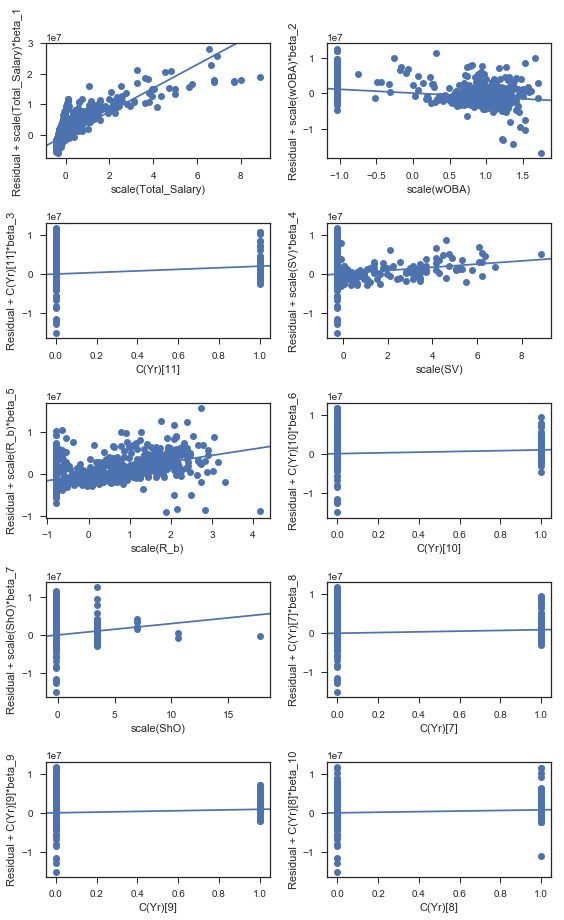

In [58]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result10, fig=fig)
fig.suptitle("")
plt.show()

### 3. Categorical Variable(Team) and All Numeric Variables

In [59]:
team_str = 'C(Team) + '

cat_num_ols_list2 = model_str + team_str + converted_num_ols + zero
cat_num_ols_list2

'Salary ~ C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + scale(Contract_Yrs) + scale(Total_Sa

### * 11th OLS analysis

In [60]:
model11 = sm.OLS.from_formula(cat_num_ols_list2, df)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     60.92
Date:                Wed, 10 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:16:06   Log-Likelihood:                -19118.
No. Observations:                1200   AIC:                         3.843e+04
Df Residuals:                    1103   BIC:                         3.892e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Team)[0]           5.174e+06   3

### * 1st Filtrating P-VALUE under 1% of 11th OLS model

In [61]:
filtration_str_list2 = team_str + converted_num_ols + zero

dfX11 = dmatrix(filtration_str_list2, data=df_x)
dfX_columns11 = dfX11.design_info.column_names
dfX11 = pd.DataFrame(dfX11, columns=dfX_columns11)

In [62]:
p_values11 = extracted_pvals(result11, 0.01)

extracted_features11 = list(p_values11.index.values)
extracted_df_x11 = dfX11.loc[:, extracted_features11]

print(extracted_df_x11.shape)
extracted_df_x11.tail()

(1200, 42)


,C(Team)[9],C(Team)[29],scale(Total_Salary),C(Team)[22],C(Team)[7],C(Team)[14],C(Team)[18],C(Team)[6],C(Team)[10],C(Team)[1],C(Team)[20],C(Team)[15],C(Team)[26],C(Team)[28],C(Team)[25],C(Team)[4],C(Team)[27],C(Team)[3],C(Team)[0],C(Team)[8],C(Team)[5],C(Team)[24],C(Team)[21],C(Team)[23],C(Team)[13],C(Team)[12],C(Team)[17],C(Team)[16],C(Team)[11],C(Team)[19],C(Team)[2],scale(SV),scale(wOBA),scale(G),scale(H_b),scale(Hits),scale(Doubles),scale(HLD),scale(wRAA),scale(HR_b),scale(R_b),scale(ShO)
1195,0.0,0.0,-0.275434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.25884,0.581669,0.563822,0.171717,0.245985,-0.195950,-0.447698,-1.846775,0.403354,0.279668,-0.167284
1196,0.0,0.0,-0.250058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25884,-1.028343,-1.427803,-0.829096,-0.820425,-0.794489,-0.447698,-0.076814,-0.649892,-0.794312,-0.167284
1197,0.0,0.0,-0.013208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.25884,1.118339,0.473294,0.886583,0.912492,0.146072,-0.447698,0.669555,1.690656,0.730046,-0.167284
1198,0.0,0.0,-0.030126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25884,0.887446,-0.250934,0.135973,0.166004,-0.281456,-0.447698,-0.364699,0.637409,-0.136066,-0.167284
1199,0.0,0.0,3.268846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25884,1.274348,0.133812,0.689995,0.485927,0.659105,-0.447698,1.319963,1.339574,0.799335,-0.167284


### * 12th OLS analysis

In [63]:
dfX12 = sm.add_constant(extracted_df_x11)

model12 = sm.OLS(dfY, dfX12)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     90.89
Date:                Wed, 10 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:16:07   Log-Likelihood:                -19359.
No. Observations:                1200   AIC:                         3.880e+04
Df Residuals:                    1158   BIC:                         3.902e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.718e+06   7

### * 2nd Filtrating P-VALUE under 1% of 12th OLS model

In [64]:
p_values12 = extracted_pvals(result12, 0.01)

extracted_features12 = list(p_values12.index.values)
extracted_df_x12 = dfX12.loc[:, extracted_features12]

print(extracted_df_x12.shape)
extracted_df_x12.tail()

(1200, 8)


,const,scale(Total_Salary),scale(wOBA),scale(SV),scale(R_b),C(Team)[9],C(Team)[29],scale(ShO)
1195,1.0,-0.275434,0.581669,-0.25884,0.279668,0.0,0.0,-0.167284
1196,1.0,-0.250058,-1.028343,-0.25884,-0.794312,0.0,0.0,-0.167284
1197,1.0,-0.013208,1.118339,-0.25884,0.730046,0.0,0.0,-0.167284
1198,1.0,-0.030126,0.887446,-0.25884,-0.136066,0.0,0.0,-0.167284
1199,1.0,3.268846,1.274348,-0.25884,0.799335,0.0,0.0,-0.167284


### * 13th OLS analysis

In [65]:
dfX13 = sm.add_constant(extracted_df_x12)

model13 = sm.OLS(dfY, dfX13)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     511.8
Date:                Wed, 10 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:16:07   Log-Likelihood:                -19390.
No. Observations:                1200   AIC:                         3.880e+04
Df Residuals:                    1192   BIC:                         3.884e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.825e+06    

## ※ In total(All Categorical variables and numeric variables, One categorical variable(Yr) and all numeric variables, and The other categorical variable(Team) and all numeric variables), the 10th OLS analysis(filtrating 1% P-VALUE about OLS modeling of the Categorical variable(Yr) and all numeric variables) showed the best result for the total number of remaining variables and the performance of the variables.

### * Eliminating Outliers of 10th OLS analysis RESULT

In [66]:
def elim_outliers2(result):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX10.columns) - 1)
    idx2 = np.where(cooks_d2 > fox_cr)[0]
    
    return idx2

In [67]:
idx2 = elim_outliers2(result10)
print(idx2, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx2)))

[   7    8   11   45  115  116  117  159  210  224  256  260  342  414  421
  425  449  475  516  593  613  667  689  692  708  709  719  728  746  752
  757  763  775  784  796  799  800  809  811  822  832  835  838  875  892
  902  905  916  919  929  951  957  959  960  972  990 1009 1031 1044 1055
 1061 1074 1077 1083 1103 1113 1115 1122 1124 1132 1133 1139 1149 1151 1167
 1180 1187 1189 1199] 

There are '79' Outliers according to Fox criteria


In [68]:
dfX10_idx = dfX10.drop(idx2)
dfY_idx2 = dfY.drop(idx2)

In [69]:
print(dfX10_idx.shape, dfY_idx2.shape)

(1121, 11) (1121, 1)


### * 10-2 OLS analysis

In [70]:
dfX10_idx_elimVer = sm.add_constant(dfX10_idx)
model_idx2_elimVer = sm.OLS(dfY_idx2, dfX10_idx_elimVer)
result_idx2_elimVer = model_idx2_elimVer.fit()
print(result_idx2_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     514.8
Date:                Wed, 10 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:16:07   Log-Likelihood:                -17629.
No. Observations:                1121   AIC:                         3.528e+04
Df Residuals:                    1110   BIC:                         3.533e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.632e+06   6

### * Filtrating P-VALUE under 1% of 10-2 OLS model¶

In [71]:
p_values10 = extracted_pvals(result_idx2_elimVer, 0.01)
extracted_features10 = p_values10.index.values
extracted_df_x10 = dfX10_idx_elimVer.loc[:, extracted_features10]
extracted_df_x10.tail()

,const,scale(Total_Salary),scale(R_b),scale(wOBA),scale(SV),C(Yr)[11],scale(ShO)
1194,1.0,-0.393859,-0.794312,-1.028343,-0.25884,1.0,-0.167284
1195,1.0,-0.275434,0.279668,0.581669,-0.25884,1.0,-0.167284
1196,1.0,-0.250058,-0.794312,-1.028343,-0.25884,1.0,-0.167284
1197,1.0,-0.013208,0.730046,1.118339,-0.25884,1.0,-0.167284
1198,1.0,-0.030126,-0.136066,0.887446,-0.25884,1.0,-0.167284


In [72]:
dfX10_2_idx_elimVer = sm.add_constant(extracted_df_x10)
model10_2 = sm.OLS(dfY_idx2, dfX10_2_idx_elimVer)
result10_2 = model10_2.fit()
print(result10_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     854.0
Date:                Wed, 10 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:16:07   Log-Likelihood:                -17632.
No. Observations:                1121   AIC:                         3.528e+04
Df Residuals:                    1114   BIC:                         3.531e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.736e+06   5

=======================================================================================

# * Deviding Batters and Pitchers to analyze the data in more detail

### - thus, Start again with Devided Data

In [73]:
bat_df = pd.read_csv('../dataset/mlb_fa_bat_list.csv')
pit_df = pd.read_csv('../dataset/mlb_fa_pit_list.csv')

In [74]:
print(pit_df.columns.tolist())

['Name', 'Yr', 'Team', 'W', 'L', 'G', 'GS', 'CG', 'IP', 'H', 'HR', 'BB', 'SO', 'R', 'SV', 'BS', 'BK', 'ER', 'HBP', 'HLD', 'IBB', 'ShO', 'TBF', 'WP', 'HR/9', 'BB/9', 'K/9', 'K/BB', 'K-BB%', 'GB%', 'HR/FB', 'LOB%', 'ERA', 'BABIP', 'FIP', 'WHIP', 'WPA', 'WAR', 'Contract Yrs', 'Total Salary($)', 'Avg Salary($)']


In [75]:
bat_df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples","BB%": "BB_Percent", "K%": "K_Percent",
                       "BB/K" : "BB_per_K", "wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs",
                       "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"}, inplace=True)

pit_df.rename(columns={"HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                       "K-BB%": "K_BB_Percent", "GB%": "GB_Percent", "HR/FB" : "HR_per_FB", "LOB%": "LOB_Percent",
                       "Contract Yrs" : "Contract_Yrs", "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"},
              inplace=True)


In [333]:
bat_df.shape

(633, 40)

In [76]:
bat_df.tail()

,Name,Yr,Team,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Contract_Yrs,Total_Salary,Salary
628,Stephen Drew,2017,Nationals,46,95,106,24,16,7,0,1,9,17,8,0,21,7.5,19.8,0.38,0.303,0,3,0,2,0,0,1.3,0.105,0.285,-3.2,0.253,0.302,0.358,0.660,0.1,70.0,-0.12,1.0,3500000.0,3500000.0
629,Trevor Plouffe,2017,Athletics,100,283,313,56,40,7,0,9,31,19,28,2,88,8.9,28.1,0.32,0.251,1,1,0,12,1,2,-4.0,0.120,0.258,-16.6,0.198,0.272,0.318,0.590,-1.2,58.0,-3.52,1.0,5250000.0,5250000.0
630,Welington Castillo,2017,Orioles,96,341,365,96,65,11,0,20,44,53,22,0,97,6.0,26.6,0.23,0.336,0,2,0,10,0,0,10.8,0.208,0.344,7.0,0.282,0.323,0.490,0.813,2.7,113.0,1.72,2.0,13000000.0,6500000.0
631,Wilson Ramos,2017,Rays,64,208,224,54,37,6,0,11,19,35,10,2,36,4.5,16.1,0.28,0.262,0,3,0,11,0,0,2.2,0.188,0.307,-2.7,0.260,0.290,0.447,0.737,0.4,92.0,-0.62,2.0,12500000.0,6250000.0
632,Yoenis Cespedes,2017,Mets,81,291,321,85,49,17,2,17,46,42,26,5,61,8.1,19.0,0.43,0.316,2,2,0,7,0,1,-6.2,0.247,0.369,13.1,0.292,0.352,0.540,0.892,1.6,131.0,0.43,4.0,110000000.0,27500000.0


In [334]:
pit_df.shape

(588, 41)

In [77]:
pit_df.tail()

,Name,Yr,Team,W,L,G,GS,CG,IP,H,HR,BB,SO,R,SV,BS,BK,ER,HBP,HLD,IBB,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP,FIP,WHIP,WPA,WAR,Contract_Yrs,Total_Salary,Salary
583,Scott Feldman,2017,Reds,7,7,21,21,1,111.1,116,21,35,93,62,0,0,0,59,6,0,2,1,472,3,1.70,2.83,7.52,2.66,12.3,42.8,21.4,74.5,4.77,0.300,5.04,1.36,0.06,0.7,1.0,2300000.0,2300000.0
584,Sergio Romo,2017,Dodgers,3,1,55,0,0,55.2,42,9,19,59,23,0,1,1,22,1,11,2,0,224,2,1.46,3.07,9.54,3.11,17.9,37.2,14.5,79.0,3.56,0.243,4.22,1.10,1.03,0.3,1.0,3000000.0,3000000.0
585,Travis Wood,2017,Royals,4,7,39,14,0,94.0,118,19,45,65,77,0,1,0,71,2,1,0,0,436,1,1.82,4.31,6.22,1.44,4.6,35.6,14.0,63.6,6.80,0.325,5.90,1.73,-2.59,-0.6,2.0,12000000.0,6000000.0
586,Trevor Cahill,2017,Padres,4,3,21,14,0,84.0,91,16,45,87,50,0,0,0,46,3,1,1,0,381,16,1.71,4.82,9.32,1.93,11.0,55.6,25.0,76.3,4.93,0.326,5.28,1.62,-1.00,0.3,1.0,1750000.0,1750000.0
587,Tyson Ross,2017,Rangers,3,3,12,10,0,49.0,53,7,37,36,46,0,0,0,42,6,0,0,0,238,4,1.29,6.80,6.61,0.97,-0.4,46.8,13.0,58.0,7.71,0.303,6.18,1.84,-1.21,-0.2,1.0,6000000.0,6000000.0


In [78]:
## Encoding Categorical Columns of Batters and Pitchers

def encode_df_x(df1, df2):
    
    ## categorical variables of Yr
    df_yr_le_b = LabelEncoder()
    bat_df['Yr'] = df_yr_le_b.fit_transform(bat_df['Yr'])
    
    df_yr_le_p = LabelEncoder()
    pit_df['Yr'] = df_yr_le_p.fit_transform(pit_df['Yr'])
    
    enc_dict_yr_b = {'Yr' : df_yr_le_b}
    enc_dict_yr_p = {'Yr' : df_yr_le_p}
        
    ## categorical variables of Team
    df_team_le_b = LabelEncoder()
    bat_df['Team'] = df_team_le_b.fit_transform(bat_df['Team'])
    
    df_team_le_p = LabelEncoder()
    pit_df['Team'] = df_team_le_p.fit_transform(pit_df['Team'])
    
    enc_dict_team_b = {'Team' : df_team_le_b}
    enc_dict_team_p = {'Team' : df_team_le_p}
    
    return bat_df, pit_df, enc_dict_yr_b, enc_dict_yr_p, enc_dict_team_b, enc_dict_team_p

train_df_x = encode_df_x(bat_df, pit_df)

## * Splitting Dependent & Independent Variables of Batters and Pitchers

In [79]:
df_batX = bat_df.iloc[:, 1:39]
df_pitX = pit_df.iloc[:, 1:40]

df_batY = pd.DataFrame(bat_df['Salary'])
df_pitY = pd.DataFrame(pit_df['Salary'])

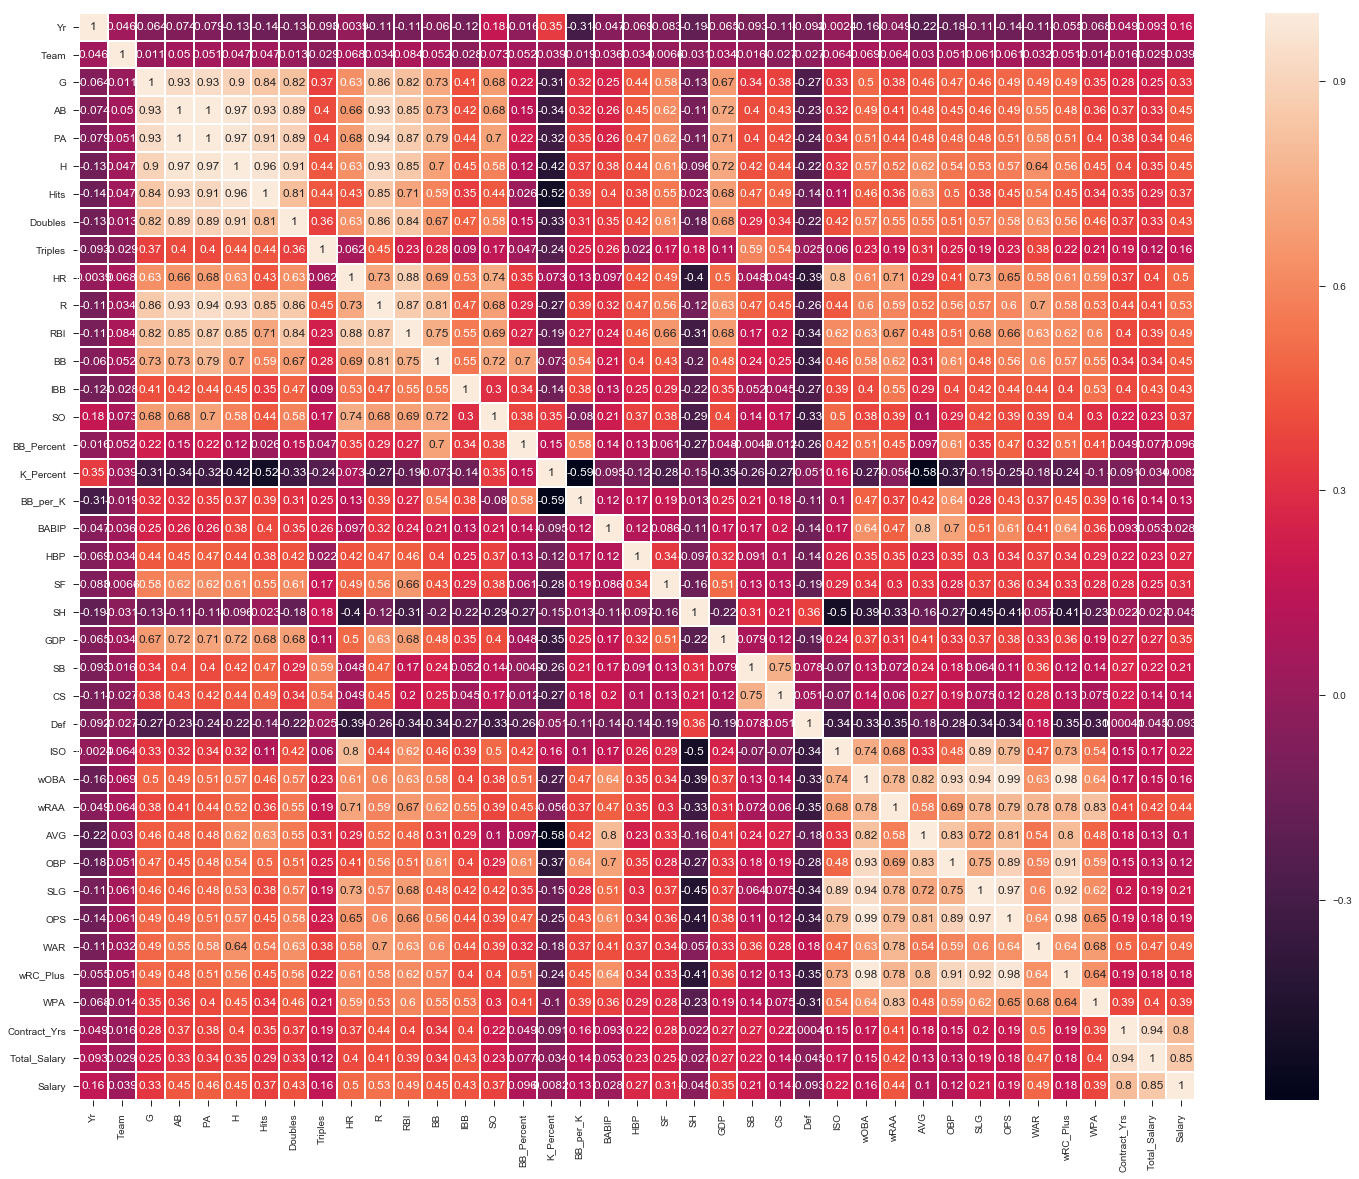

In [80]:
## Checking Correlation for Batters Independent Variables

plt.figure(figsize=(25, 20))
bat_df_corr = pd.DataFrame.corr(bat_df)
sns.heatmap(bat_df_corr, annot=True, linewidths=1)
plt.show()

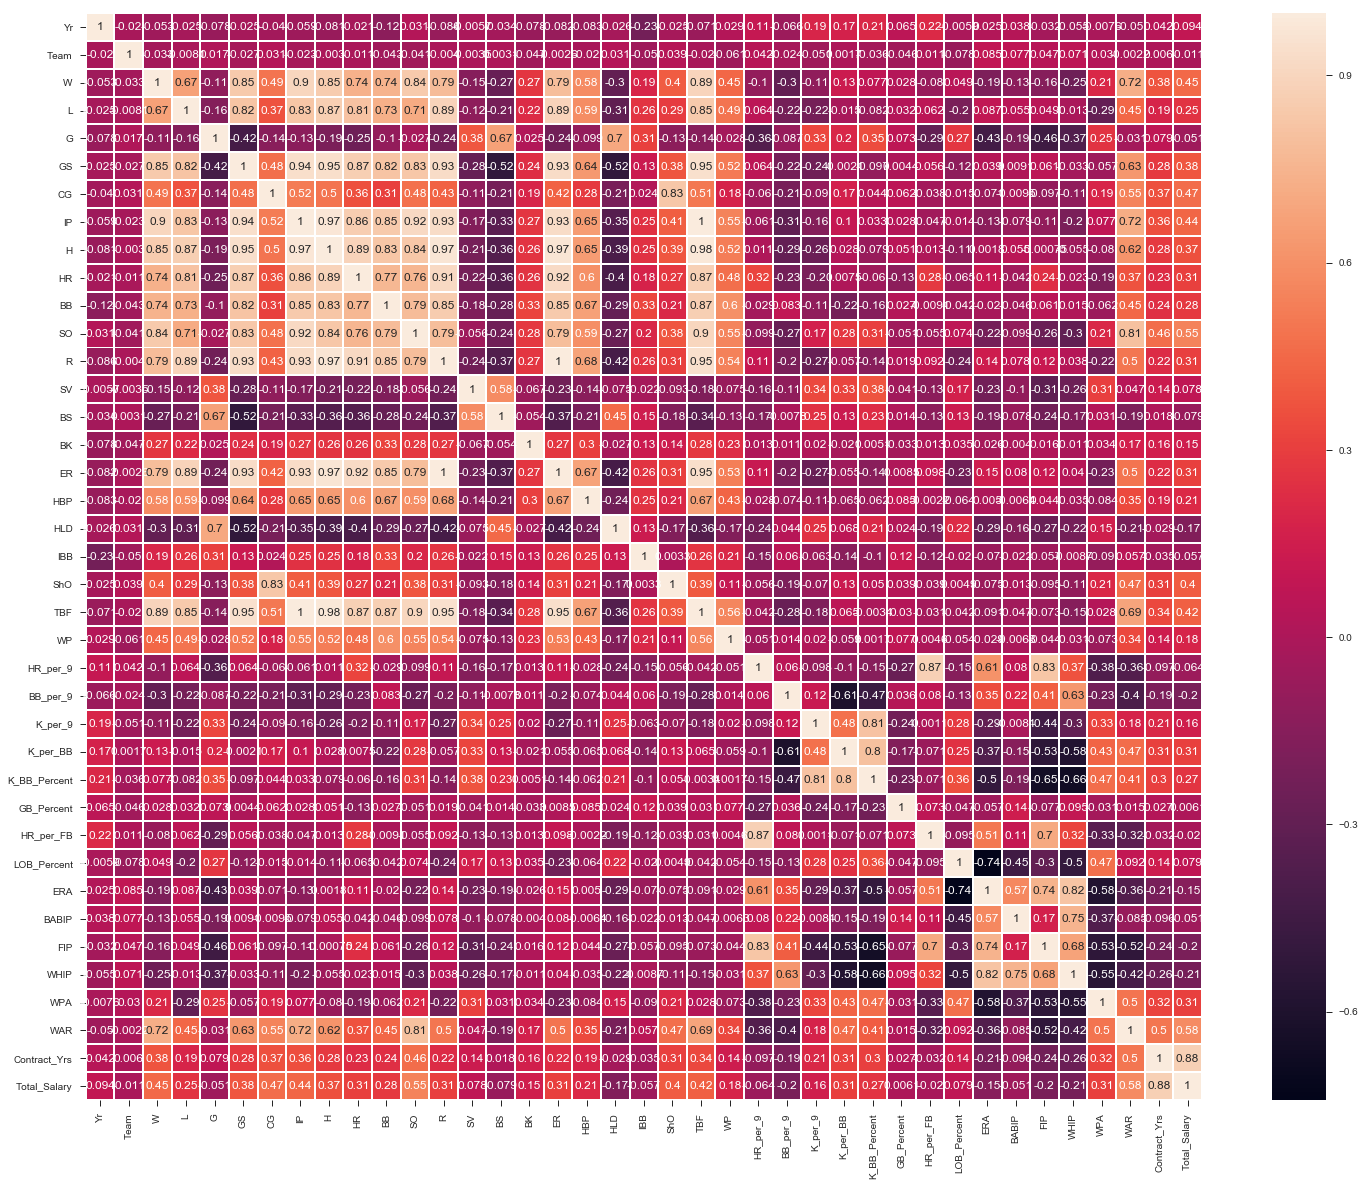

In [81]:
## Checking Correlation for Pitchers Independent Variables

plt.figure(figsize=(25, 20))
pit_df_corr = pd.DataFrame.corr(df_pitX)
sns.heatmap(pit_df_corr, annot=True, linewidths=1)
plt.show()

## * 1st  Batters info Modeling and P-VALUE check

In [82]:
bat_dfX = sm.add_constant(df_batX)
bat_dfY = pd.DataFrame(df_batY, columns=["Salary"])

In [83]:
model_bat = sm.OLS(df_batY, bat_dfX)
result_bat = model_bat.fit()
print(result_bat.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     75.60
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          9.65e-199
Time:                        19:16:14   Log-Likelihood:                -10175.
No. Observations:                 633   AIC:                         2.043e+04
Df Residuals:                     595   BIC:                         2.060e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.886e+06   4.75e+06      0.818   

## * 1st  Pitchers info Modeling and P-VALUE check

In [84]:
pit_dfX = sm.add_constant(df_pitX)
pit_dfY = pd.DataFrame(df_pitY, columns=['Salary'])

In [85]:
model_pit = sm.OLS(pit_dfY, pit_dfX)
result_pit = model_pit.fit()
print(result_pit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     83.45
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.51e-203
Time:                        19:16:14   Log-Likelihood:                -9313.4
No. Observations:                 588   AIC:                         1.871e+04
Df Residuals:                     548   BIC:                         1.888e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -6.87e+06    3.9e+06     -1.760   

## * Scaling above Batters and Pitchers Data

In [86]:
b_cols_list = df_batX.columns.tolist()
p_cols_list = df_pitX.columns.tolist()

In [87]:
bat_cols_list = " + ".join(b_cols_list)
pit_cols_list = " + ".join(p_cols_list)

# * Batters

### * OLS analysis that uses 'from-formula' for Batters

In [88]:
salary_str = "Salary ~ "

In [89]:
ols_bat_list = salary_str + bat_cols_list
ols_pit_list = salary_str + pit_cols_list
ols_bat_list

'Salary ~ Yr + Team + G + AB + PA + H + Hits + Doubles + Triples + HR + R + RBI + BB + IBB + SO + BB_Percent + K_Percent + BB_per_K + BABIP + HBP + SF + SH + GDP + SB + CS + Def + ISO + wOBA + wRAA + AVG + OBP + SLG + OPS + WAR + wRC_Plus + WPA + Contract_Yrs + Total_Salary'

In [90]:
model_bat2 = sm.OLS.from_formula(ols_bat_list, data=bat_df)
result_bat2 = model_bat2.fit()
print(result_bat2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     75.60
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          9.65e-199
Time:                        19:16:15   Log-Likelihood:                -10175.
No. Observations:                 633   AIC:                         2.043e+04
Df Residuals:                     595   BIC:                         2.060e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.886e+06   4.75e+06      0.818   

### * Filtrating 1% P-VALUE of from-formula OLS modeling for Batters

In [91]:
dfX_bat1 = dmatrix(bat_cols_list, df_batX)
dfX_bat1_columns = dfX_bat1.design_info.column_names
dfX_bat1 = pd.DataFrame(dfX_bat1, columns=dfX_bat1_columns)

In [92]:
bat_pvalues1 = extracted_pvals(result_bat2, 0.01)

extracted_feature_b1 = bat_pvalues1.index.values
extracted_bat_x1 = dfX_bat1.loc[:, extracted_feature_b1]

In [93]:
dfX_bat2 = sm.add_constant(extracted_bat_x1)

model_bat2 = sm.OLS(df_batY, dfX_bat2)
result_bat2 = model_bat2.fit()
print(result_bat2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     708.4
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          3.47e-201
Time:                        19:16:15   Log-Likelihood:                -10259.
No. Observations:                 633   AIC:                         2.053e+04
Df Residuals:                     629   BIC:                         2.054e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.627e+06   3.64e+05      7.227   

=======================================================================================

## * Deviding 3Types OLS modeling(Numeric Variables ONLY, One Categorical Variable(Yr) and All Numeric Variables, and The other Categorical Variable(Team) and All Numeric Variables) for 'BATTERS'

In [94]:
cols_b = df_batX.columns.tolist()

cat_cols_b = cols_b[:2]
num_cols_b = cols_b[2:70]

cat_cols_list_b = []
num_cols_list_b = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols_b:
        cat_cols_list_b.append("C(" + item1 + ")")
        
    for item2 in num_cols_b:
        num_cols_list_b.append("scale(" + item2 + ")")
        
    return cat_cols_list_b, num_cols_list_b

converted_cols_b = r_style_cat_cols(cat_cols_b, num_cols_b)

converted_cols_list_b = " + ".join(cat_cols_list_b + num_cols_list_b)
model_str_b = "Salary ~ "

zero = ' + 0'

ols_str_list_b = model_str_b + converted_cols_list_b + zero
merging_converted_cols_b = cat_cols_list_b + num_cols_list_b

### 1. Numeric Variables ONLY

### * 3rd OLS analysis

In [95]:
converted_num_ols_b = " + ".join(num_cols_list_b)

num_ols_model_b = model_str_b + converted_num_ols_b
num_ols_model_b

'Salary ~ scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(Contract_Yrs) + scale(Total_Salary)'

In [96]:
model_bat3 = sm.OLS.from_formula(num_ols_model_b, data=bat_df)
result_bat3 = model_bat3.fit()
print(result_bat3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     79.17
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          2.67e-199
Time:                        19:16:15   Log-Likelihood:                -10179.
No. Observations:                 633   AIC:                         2.043e+04
Df Residuals:                     597   BIC:                         2.059e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.164e+06   9

### * 1st Filtrating P-VALUE under 1% of 3rd OLS model for Batters

In [97]:
dfX_bat3 = dmatrix(converted_num_ols_b, df_batX)
dfX_bat3_columns = dfX_bat3.design_info.column_names
dfX_bat3 = pd.DataFrame(dfX_bat3, columns=dfX_bat3_columns)

In [98]:
bat_pvalues3 = extracted_pvals(result_bat3, 0.01)

extracted_feature_b3 = list(bat_pvalues3.index.values)
extracted_bat_x3 = dfX_bat3.loc[:, extracted_feature_b3]

### * 4th OLS analysis for Batters

In [99]:
dfX_bat4 = sm.add_constant(extracted_bat_x3)
model_bat4 = sm.OLS(df_batY, dfX_bat4)
result_bat4 = model_bat4.fit()
print(result_bat4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     348.3
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          5.72e-211
Time:                        19:16:15   Log-Likelihood:                -10223.
No. Observations:                 633   AIC:                         2.046e+04
Df Residuals:                     625   BIC:                         2.050e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.164e+06    

### * Filtrating P-VALUE under 1% of 4th OLS model for Batters

In [100]:
bat_pvalues4 = extracted_pvals(result_bat4, 0.01)

extracted_feature_b4 = list(bat_pvalues4.index.values)
extracted_bat_x4 = dfX_bat4.loc[:, extracted_feature_b4]

In [101]:
dfX_bat4_1 = sm.add_constant(extracted_bat_x4)
model_bat4_1 = sm.OLS(bat_dfY, dfX_bat4_1)
result_bat4_1 = model_bat4_1.fit()
print(result_bat4_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     404.6
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.21e-211
Time:                        19:16:15   Log-Likelihood:                -10225.
No. Observations:                 633   AIC:                         2.046e+04
Df Residuals:                     626   BIC:                         2.049e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.164e+06    

### 2. Categorical Variable(Yr) and All Numeric Variables

In [102]:
yr_str_b = 'C(Yr) + '

cat_num_ols_list_b = model_str + yr_str_b + converted_num_ols_b + zero
cat_num_ols_list_b

'Salary ~ C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(Contract_Yrs) + scale(Total_Salary) + 0'

### * 5th OLS analysis for Batters

In [103]:
model_bat5 = sm.OLS.from_formula(cat_num_ols_list_b, bat_df)
result_bat5 = model_bat5.fit()
print(result_bat5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     64.34
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          6.32e-198
Time:                        19:16:16   Log-Likelihood:                -10156.
No. Observations:                 633   AIC:                         2.041e+04
Df Residuals:                     586   BIC:                         2.062e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]             5.788e+06   5

### * 1st Filtrating P-VALUE under 1% of 5th OLS model for Batters

In [104]:
filtration_str_list_b = yr_str + converted_num_ols_b + zero

dfX_bat5 = dmatrix(filtration_str_list_b, df_batX)
dfX_bat5_columns = dfX_bat5.design_info.column_names
dfX_bat5 = pd.DataFrame(dfX_bat5, columns=dfX_bat5_columns)

In [105]:
bat_pvalues5 = extracted_pvals(result_bat5, 0.01)

extracted_feature_b5 = list(bat_pvalues5.index.values)
extracted_bat_x5 = dfX_bat5.loc[:, extracted_feature_b5]

### * 6th OLS analysis for Batters

In [106]:
dfX_bat6 = sm.add_constant(extracted_bat_x5)
model_bat6 = sm.OLS(df_batY, dfX_bat6)
result_bat6 = model_bat6.fit()
print(result_bat6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     148.2
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          2.31e-204
Time:                        19:16:16   Log-Likelihood:                -10211.
No. Observations:                 633   AIC:                         2.046e+04
Df Residuals:                     615   BIC:                         2.054e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.863e+06   9

### * Filtrating P-VALUE under 1% of 6th OLS model for Batters

In [107]:
bat_pvalues6 = extracted_pvals(result_bat6, 0.01)

extracted_feature_b6 = list(bat_pvalues6.index.values)
extracted_bat_x6 = dfX_bat6.loc[:, extracted_feature_b6]

### * 7th OLS analysis for Batters

In [108]:
dfX_bat7 = sm.add_constant(extracted_bat_x6)
model_bat7 = sm.OLS(df_batY, dfX_bat7)
result_bat7 = model_bat7.fit()
print(result_bat7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     228.2
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          8.38e-210
Time:                        19:16:16   Log-Likelihood:                -10214.
No. Observations:                 633   AIC:                         2.045e+04
Df Residuals:                     621   BIC:                         2.051e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 4.77e+06    

### * Filtrating P-VALUE under 1% of 7th OLS model for Batters

In [109]:
bat_pvalues7 = extracted_pvals(result_bat7, 0.01)
extracted_feature_b7 = list(bat_pvalues7.index.values)
extracted_bat_x7 = dfX_bat7.loc[:, extracted_feature_b7]

### * 8th OLS analysis for Batters

In [110]:
dfX_bat8 = sm.add_constant(extracted_bat_x7)
model_bat8 = sm.OLS(bat_dfY, dfX_bat8)
result_bat8 = model_bat8.fit()
print(result_bat8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     249.0
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          5.47e-210
Time:                        19:16:16   Log-Likelihood:                -10217.
No. Observations:                 633   AIC:                         2.046e+04
Df Residuals:                     622   BIC:                         2.050e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.659e+06   1

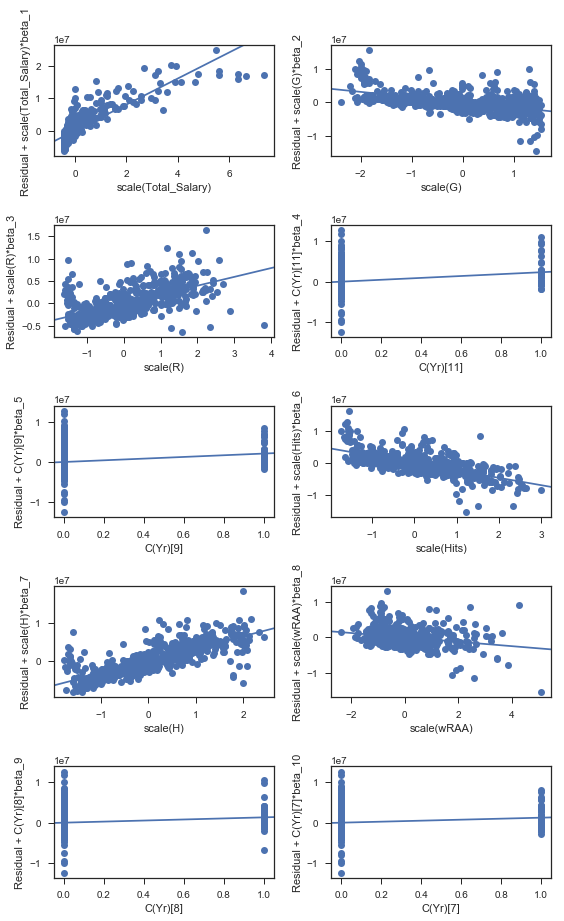

In [111]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_bat8, fig=fig)
fig.suptitle("")
plt.show()

### 3. Categorical Variable(Team) and All Numeric Variables

In [112]:
team_str_b = 'C(Team) + '

cat_num_ols_list2_b = model_str + team_str_b + converted_num_ols_b + zero
cat_num_ols_list2_b

'Salary ~ C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(Contract_Yrs) + scale(Total_Salary) + 0'

### * 9th OLS analysis for Batters

In [113]:
model_bat9 = sm.OLS.from_formula(cat_num_ols_list2_b, bat_df)
result_bat9 = model_bat9.fit()
print(result_bat9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     43.99
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          2.01e-180
Time:                        19:16:18   Log-Likelihood:                -10161.
No. Observations:                 633   AIC:                         2.045e+04
Df Residuals:                     568   BIC:                         2.074e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Team)[0]           5.305e+06    

### * 1st Filtrating P-VALUE under 1% of 9th OLS model

In [114]:
filtration_str_list2_b = team_str_b + converted_num_ols_b + zero

dfX_bat9 = dmatrix(filtration_str_list2_b, data=bat_df)
dfX_bat9_columns = dfX_bat9.design_info.column_names
dfX_bat9 = pd.DataFrame(dfX_bat9, columns=dfX_bat9_columns)

In [115]:
bat_pvalues9 = extracted_pvals(result_bat9, 0.01)

extracted_features9 = list(bat_pvalues9.index.values)
extracted_bat_x9 = dfX_bat9.loc[:, extracted_features9]

### * 10th OLS analysis for Batters

In [116]:
dfX_bat10 = sm.add_constant(extracted_bat_x9)
model_bat10 = sm.OLS(bat_dfY, dfX_bat10)
result_bat10 = model_bat10.fit()
print(result_bat10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     67.58
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          7.05e-183
Time:                        19:16:18   Log-Likelihood:                -10219.
No. Observations:                 633   AIC:                         2.051e+04
Df Residuals:                     597   BIC:                         2.067e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 4.95e+06   1

### * Filtrating P-VALUE under 1% of 10th OLS model

In [117]:
bat_pvalues10 = extracted_pvals(result_bat10, 0.01)
extracted_feature_b10 = list(bat_pvalues10.index.values)
extracted_bat_x10 = dfX_bat10.loc[:, extracted_feature_b10]

### * 11th OLS analysis for Batters

In [118]:
dfX_bat11 = sm.add_constant(extracted_bat_x10)
model_bat11 = sm.OLS(bat_dfY, dfX_bat11)
result_bat11 = model_bat11.fit()
print(result_bat11.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     391.8
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          3.40e-208
Time:                        19:16:18   Log-Likelihood:                -10233.
No. Observations:                 633   AIC:                         2.048e+04
Df Residuals:                     626   BIC:                         2.051e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 5.05e+06   1

### * Filtrating P-VALUE under 1% of 12th OLS model

In [119]:
bat_pvalues11 = extracted_pvals(result_bat11, 0.01)
extracted_feature_b11 = list(bat_pvalues11.index.values)
extracted_bat_x11 = dfX_bat11.loc[:, extracted_feature_b11]

### * 12th OLS analysis for Batters

In [120]:
dfX_bat12 = sm.add_constant(extracted_bat_x11)
model_bat12 = sm.OLS(bat_dfY, dfX_bat12)
result_bat12 = model_bat12.fit()
print(result_bat12.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     576.1
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.73e-208
Time:                        19:16:18   Log-Likelihood:                -10238.
No. Observations:                 633   AIC:                         2.049e+04
Df Residuals:                     628   BIC:                         2.051e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.164e+06   1

## ※ In total(3Types for Batters), the 8th OLS analysis(filtrating 1% P-VALUE about OLS modeling of the Categorical variable(Yr) and all numeric variables) showed the best result for the total number of remaining variables and the performance of the variables.

=======================================================================================

# * Pitchers

### * OLS analysis that uses 'from-formula' for Pitchers

In [121]:
salary_str = "Salary ~ "

In [122]:
ols_pit_list = salary_str + pit_cols_list
ols_pit_list = salary_str + pit_cols_list
ols_pit_list

'Salary ~ Yr + Team + W + L + G + GS + CG + IP + H + HR + BB + SO + R + SV + BS + BK + ER + HBP + HLD + IBB + ShO + TBF + WP + HR_per_9 + BB_per_9 + K_per_9 + K_per_BB + K_BB_Percent + GB_Percent + HR_per_FB + LOB_Percent + ERA + BABIP + FIP + WHIP + WPA + WAR + Contract_Yrs + Total_Salary'

### * Filtrating 1% P-VALUE of OLS modeling for Pitchers

In [123]:
dfX_pit1 = dmatrix(pit_cols_list, df_pitX)
dfX_pit1_columns = dfX_pit1.design_info.column_names
dfX_pit1 = pd.DataFrame(dfX_pit1, columns=dfX_pit1_columns)

In [124]:
pit_pvalues1 = extracted_pvals(result_pit, 0.01)

extracted_feature_b1 = pit_pvalues1.index.values
extracted_pit_x1 = dfX_pit1.loc[:, extracted_feature_b1]

### * 2nd OLS analysis for Pitchers

In [125]:
dfX_pit2 = sm.add_constant(extracted_pit_x1)

model_pit2 = sm.OLS(df_pitY, dfX_pit2)
result_pit2 = model_pit2.fit()
print(result_pit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     747.9
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          6.63e-228
Time:                        19:16:18   Log-Likelihood:                -9349.8
No. Observations:                 588   AIC:                         1.871e+04
Df Residuals:                     583   BIC:                         1.873e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.775e+06   1.13e+05     15.705   

=======================================================================================

In [126]:
cols_p = df_pitX.columns.tolist()

cat_cols_p = cols_p[:2]
num_cols_p = cols_p[2:70]

cat_cols_list_p = []
num_cols_list_p = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols_p:
        cat_cols_list_p.append("C(" + item1 + ")")
        
    for item2 in num_cols_p:
        num_cols_list_p.append("scale(" + item2 + ")")
        
    return cat_cols_list_p, num_cols_list_p

converted_cols_p = r_style_cat_cols(cat_cols_p, num_cols_p)

converted_cols_list_p = " + ".join(cat_cols_list_p + num_cols_list_p)
model_str_p = "Salary ~ "

zero = ' + 0'

ols_str_list_p = model_str_p + converted_cols_list_p + zero
merging_converted_cols_p = cat_cols_list_p + num_cols_list_p

### 1. Numeric Variables ONLY

### * 3rd OLS analysis for Pitchers

In [127]:
converted_num_ols_p = " + ".join(num_cols_list_p)

num_ols_model_p = model_str_p + converted_num_ols_p
num_ols_model_p

'Salary ~ scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + scale(Contract_Yrs) + scale(Total_Salary)'

In [128]:
model_pit3 = sm.OLS.from_formula(num_ols_model_p, data=pit_df)
result_pit3 = model_pit3.fit()
print(result_pit3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     87.11
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          3.79e-204
Time:                        19:16:19   Log-Likelihood:                -9316.8
No. Observations:                 588   AIC:                         1.871e+04
Df Residuals:                     550   BIC:                         1.888e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.969e+06   7

### * 1st Filtrating P-VALUE under 1% of 3rd OLS model for Pitchers

In [129]:
dfX_pit3 = dmatrix(converted_num_ols_p, df_pitX)
dfX_pit3_columns = dfX_pit3.design_info.column_names
dfX_pit3 = pd.DataFrame(dfX_pit3, columns=dfX_pit3_columns)

In [130]:
pit_pvalues3 = extracted_pvals(result_pit3, 0.01)

extracted_feature_p3 = list(pit_pvalues3.index.values)
extracted_pit_x3 = dfX_pit3.loc[:, extracted_feature_p3]

### * 4th OLS analysis for Pitchers

In [131]:
dfX_pit4 = sm.add_constant(extracted_pit_x3)
model_pit4 = sm.OLS(df_pitY, dfX_pit4)
result_pit4 = model_pit4.fit()
print(result_pit4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     747.9
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          6.63e-228
Time:                        19:16:19   Log-Likelihood:                -9349.8
No. Observations:                 588   AIC:                         1.871e+04
Df Residuals:                     583   BIC:                         1.873e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.969e+06   8

### 2. Categorical Variable(Yr) and All Numeric Variables

In [132]:
yr_str_p = 'C(Yr) + '

cat_num_ols_list_p = model_str + yr_str_p + converted_num_ols_p + zero
cat_num_ols_list_p

'Salary ~ C(Yr) + scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + scale(Contract_Yrs) + scale(Total_Salary) + 0'

### * 5th OLS analysis for Pitchers

In [133]:
model_pit5 = sm.OLS.from_formula(cat_num_ols_list_p, pit_df)
result_pit5 = model_pit5.fit()
print(result_pit5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     68.56
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          8.09e-198
Time:                        19:16:19   Log-Likelihood:                -9306.4
No. Observations:                 588   AIC:                         1.871e+04
Df Residuals:                     539   BIC:                         1.893e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]             5.089e+06   3

### * 1st Filtrating P-VALUE under 1% of 5th OLS model for Pitchers

In [134]:
filtration_str_list_p = yr_str + converted_num_ols_p + zero

dfX_pit5 = dmatrix(filtration_str_list_p, df_pitX)
dfX_pit5_columns = dfX_pit5.design_info.column_names
dfX_pit5 = pd.DataFrame(dfX_pit5, columns=dfX_pit5_columns)

In [135]:
pit_pvalues5 = extracted_pvals(result_pit5, 0.01)

extracted_feature_p5 = list(pit_pvalues5.index.values)
extracted_pit_x5 = dfX_pit5.loc[:, extracted_feature_p5]

### * 6th OLS analysis for Pitchers

In [136]:
dfX_pit6 = sm.add_constant(extracted_pit_x5)
model_pit6 = sm.OLS(df_pitY, dfX_pit6)
result_pit6 = model_pit6.fit()
print(result_pit6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.8
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          5.54e-218
Time:                        19:16:20   Log-Likelihood:                -9339.7
No. Observations:                 588   AIC:                         1.871e+04
Df Residuals:                     572   BIC:                         1.878e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 4.57e+06   7

### * Filtrating P-VALUE under 1% of 6th OLS model for Pitchers

In [137]:
pit_pvalues6 = extracted_pvals(result_pit6, 0.01)

extracted_feature_p6 = list(pit_pvalues6.index.values)
extracted_pit_x6 = dfX_pit6.loc[:, extracted_feature_p6]

### * 7th OLS analysis for Pitchers

In [138]:
dfX_pit7 = sm.add_constant(extracted_pit_x6)
model_pit7 = sm.OLS(df_pitY, dfX_pit7)
result_pit7 = model_pit7.fit()
print(result_pit7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     611.5
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          6.21e-229
Time:                        19:16:20   Log-Likelihood:                -9344.0
No. Observations:                 588   AIC:                         1.870e+04
Df Residuals:                     582   BIC:                         1.873e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.892e+06    

### 3. Categorical Variable(Team) and All Numeric Variables

In [139]:
team_str_p = 'C(Team) + '

cat_num_ols_list2_p = model_str + team_str_p + converted_num_ols_p + zero
cat_num_ols_list2_p

'Salary ~ C(Team) + scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + scale(Contract_Yrs) + scale(Total_Salary) + 0'

### * 8th OLS analysis for Pitchers

In [140]:
model_pit8 = sm.OLS.from_formula(cat_num_ols_list2_p, pit_df)
result_pit8 = model_pit8.fit()
print(result_pit8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     50.24
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          6.68e-186
Time:                        19:16:20   Log-Likelihood:                -9295.9
No. Observations:                 588   AIC:                         1.873e+04
Df Residuals:                     521   BIC:                         1.902e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Team)[0]            5.26e+06   5

### * 1st Filtrating P-VALUE under 1% of 8th OLS model

In [141]:
filtration_str_list2_p = team_str_p + converted_num_ols_p + zero

dfX_pit8 = dmatrix(filtration_str_list2_p, data=pit_df)
dfX_pit8_columns = dfX_pit8.design_info.column_names
dfX_pit8 = pd.DataFrame(dfX_pit8, columns=dfX_pit8_columns)

In [142]:
pit_pvalues8 = extracted_pvals(result_pit8, 0.01)

extracted_features8 = list(pit_pvalues8.index.values)
extracted_pit_x8 = dfX_pit8.loc[:, extracted_features8]

### * 9th OLS analysis for Pitchers

In [143]:
dfX_pit9 = sm.add_constant(extracted_pit_x8)
model_pit9 = sm.OLS(pit_dfY, dfX_pit9)
result_pit9 = model_pit9.fit()
print(result_pit9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     92.78
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          3.60e-202
Time:                        19:16:21   Log-Likelihood:                -9331.4
No. Observations:                 588   AIC:                         1.873e+04
Df Residuals:                     554   BIC:                         1.888e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.775e+06   8

### * Filtrating P-VALUE under 1% of 9th OLS model

In [144]:
pit_pvalues9 = extracted_pvals(result_pit9, 0.01)
extracted_feature_p9 = list(pit_pvalues9.index.values)
extracted_pit_x9 = dfX_pit9.loc[:, extracted_feature_p9]

### * 10th OLS analysis for Pitchers

In [145]:
dfX_pit10 = sm.add_constant(extracted_pit_x9)
model_pit10 = sm.OLS(pit_dfY, dfX_pit10)
result_pit10 = model_pit10.fit()
print(result_pit10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     615.9
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.08e-229
Time:                        19:16:21   Log-Likelihood:                -9342.2
No. Observations:                 588   AIC:                         1.870e+04
Df Residuals:                     582   BIC:                         1.872e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.899e+06   8

In [146]:
print(dfX10.columns.tolist())

['const', 'scale(Total_Salary)', 'scale(wOBA)', 'C(Yr)[11]', 'scale(SV)', 'scale(R_b)', 'C(Yr)[10]', 'scale(ShO)', 'C(Yr)[7]', 'C(Yr)[9]', 'C(Yr)[8]']


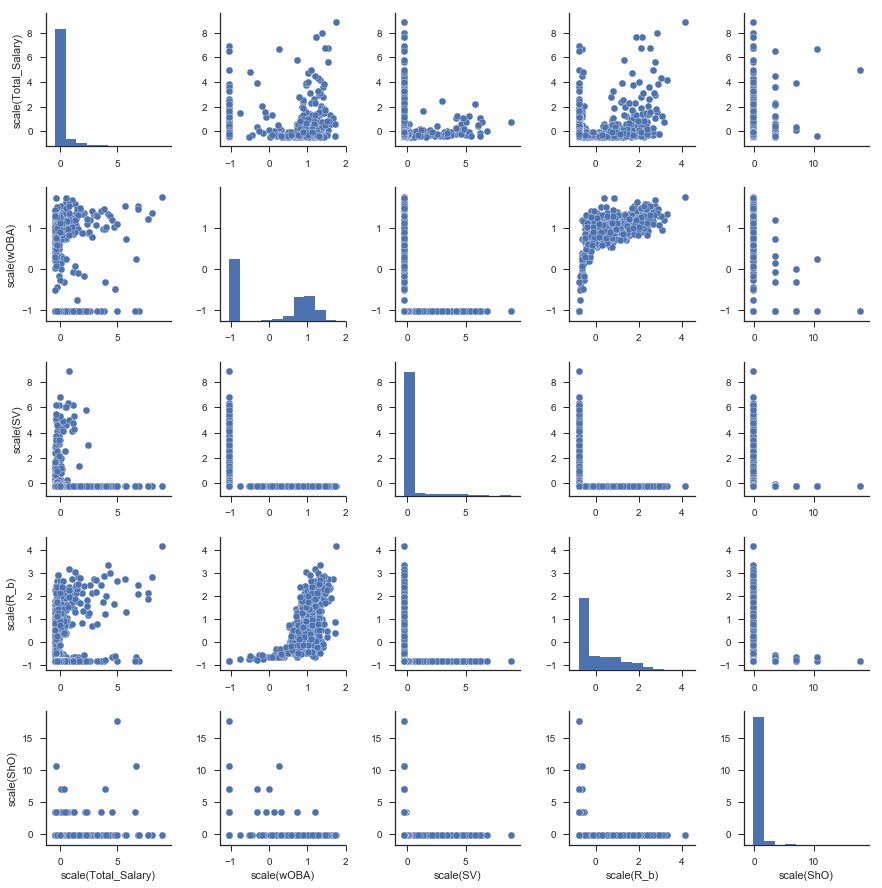

In [147]:
cols = ['scale(Total_Salary)', 'scale(wOBA)', 'scale(SV)', 'scale(R_b)', 'scale(ShO)']
sns.pairplot(extracted_df_x9[cols])
plt.show()

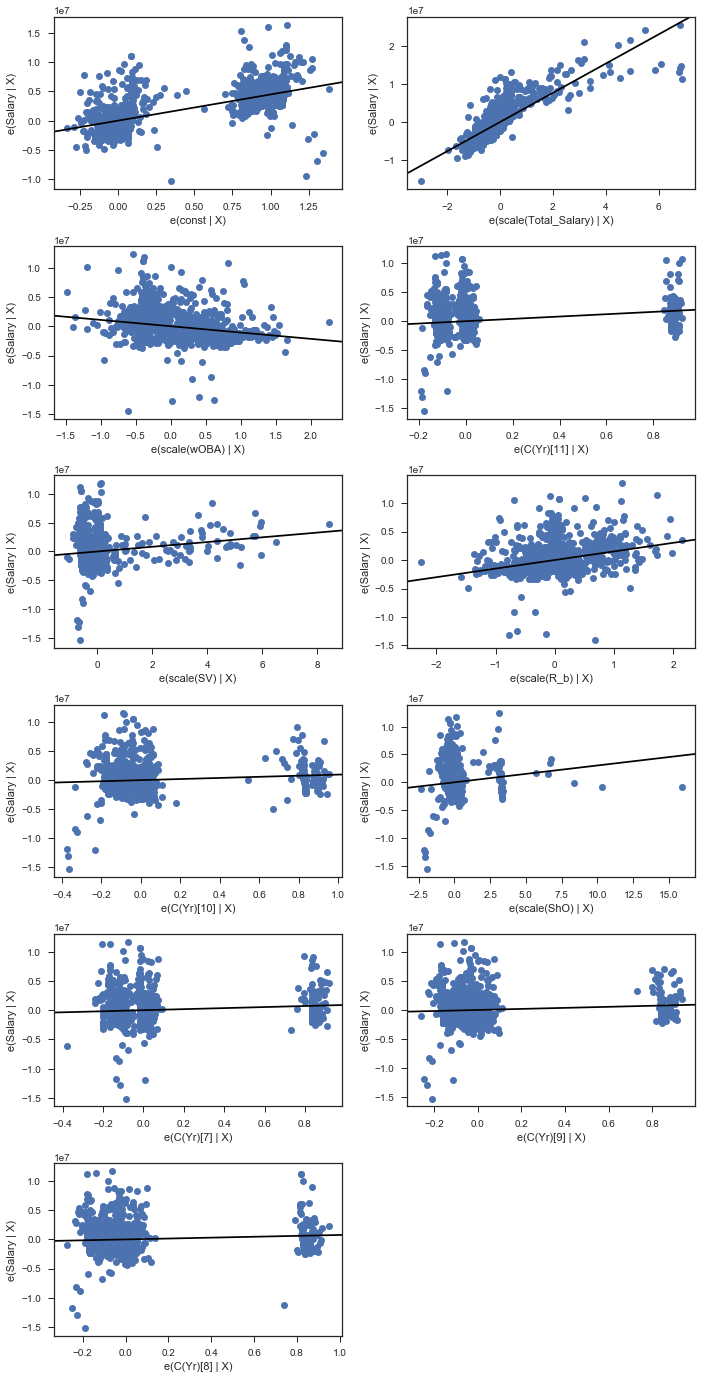

In [148]:
fig = plt.figure(figsize=(10,20))
sm.graphics.plot_partregress_grid(result10, fig=fig)
fig.suptitle("")
plt.show()

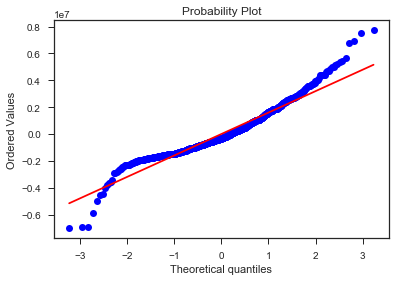

In [149]:
sp.stats.probplot(result10_2.resid, plot=plt)
plt.show()

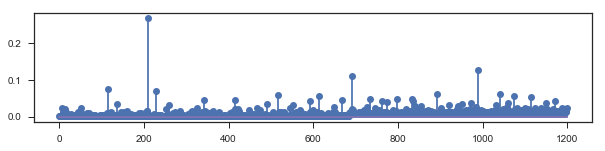

In [150]:
influence = result10.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

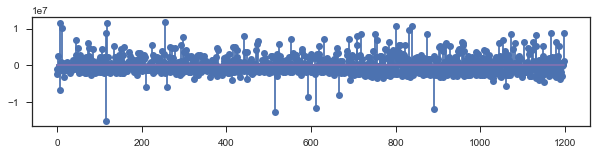

In [151]:
plt.figure(figsize=(10, 2))
plt.stem(result10.resid)
plt.show()

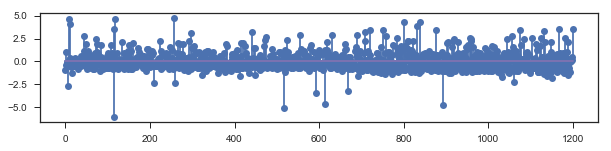

In [152]:
plt.figure(figsize=(10, 2))
plt.stem(result10.resid_pearson)
plt.show()

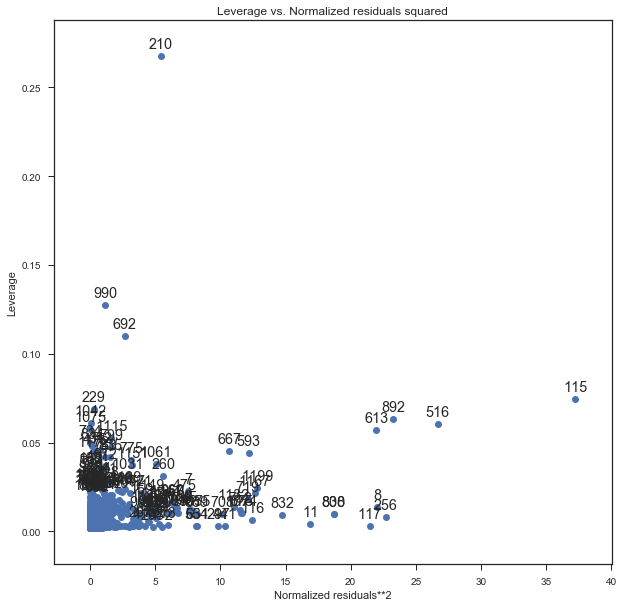

In [153]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(10,10))
fig = plot_leverage_resid2(result10, ax = ax)

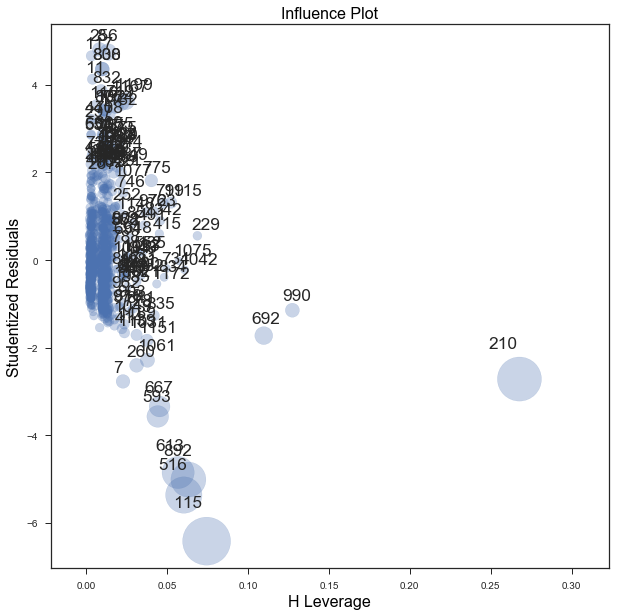

In [154]:
fig, ax = plt.subplots(figsize=(10,10))
sm.graphics.influence_plot(result10, plot_alpha=0.3, ax = ax)
plt.show()

## * Checking SCORE and RMSE  for the selected model(10th, not deviding data)

In [276]:
from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV, RidgeCV, ElasticNetCV, LogisticRegression
from sklearn import cross_validation, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import explained_variance_score, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
import warnings

warnings.filterwarnings("ignore")

In [156]:
X = dfX10.values
y = dfY.values

In [293]:
## Why include shuffle of Signature?
## A: Because the data is aligned by year, the shuffle is set 'True' to eliminate sequential alignment.

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, shuffle=True, random_state=0)

In [294]:
X_test.shape

(240, 11)

In [295]:
y_test.shape

(240, 1)

In [296]:
y_test_ = y_test.copy()
y_test_ = y_test_.astype(int)

## * Regression analysis using "Linear Regression" model

In [326]:
modelLR = LinearRegression(fit_intercept=True).fit(X_train, y_train)

In [327]:
print(np.sqrt(mean_squared_error(y_train, modelLR.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, modelLR.predict(X_test))))

2389348.00499
2776670.58454


In [328]:
modelLR.score(X_test, y_test)

0.71428210784212098

In [329]:
print('Coefficients: ', modelLR.coef_)

Coefficients:  [[       0.          3802457.91178607 -1188455.84590326  1821746.66630734
    477233.73057624  1622614.7448873   1048714.16015798   279313.40146963
    854557.13538381   864874.31731972   600062.403437  ]]


## * Regression analysis using "XGBoost" model 1

In [303]:
df_xgb = XGBRegressor(subsample=0.75)

In [304]:
df_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75)

In [305]:
xgb_pred = df_xgb.predict(X_test)
print(explained_variance_score(xgb_pred, y_test), '\n')
print(np.sqrt(mean_squared_error(y_train, df_xgb.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, xgb_pred)))

0.88845816043 

1139691.44929
1626361.23678


In [332]:
## Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y_test, xgb_pred)) - np.sqrt(mean_squared_error(y_train, df_xgb.predict(X_train))))

486669.787489


In [306]:
df_xgb.predict(X_test)
df_xgb.score(X_test, y_test)

0.9019781831779542

## * Regression analysis using "XGBoost" model 2

In [307]:
xgb_model1 = XGBRegressor()

In [308]:
xgb_model1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [309]:
y_pred_xgb1_test = xgb_model1.predict(X_test)
print(explained_variance_score(y_pred_xgb1_test, y_test), '\n')
print(np.sqrt(mean_squared_error(y_train, xgb_model1.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, y_pred_xgb1_test)))

0.885441198674 

1150104.15256
1621832.39293


In [331]:
## Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y_test, y_pred_xgb1_test)) - np.sqrt(mean_squared_error(y_train, xgb_model1.predict(X_train))))

471728.240373


In [310]:
xgb_model1.predict(X_test)
xgb_model1.score(X_test, y_test)

0.90252333563695686

## * Regression analysis using "SVR" model

In [311]:
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [312]:
y_pred_svm = svm_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, svm_model.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, y_pred_svm)))

5321927.30591
5685370.91828


## * Regression analysis using the "LassoLarsCV" model

In [313]:
modelLL = LassoLarsCV(cv=10, precompute=False).fit(X_train, y_train)

In [314]:
train_error = np.sqrt(mean_squared_error(y_train, modelLL.predict(X_train)))
test_error = np.sqrt(mean_squared_error(y_test, modelLL.predict(X_test)))

In [315]:
print ('training data RMSE: ', train_error)
print ('test data RMSE: ', test_error)

training data RMSE:  2389348.00499
test data RMSE:  2776670.58454


## * Regression analysis using the "LassoCV" model

In [316]:
modelLS = LassoCV(cv=10, precompute=False).fit(X_train, y_train)

In [317]:
train_errorLS = np.sqrt(mean_squared_error(y_train, modelLS.predict(X_train)))
test_errorLS = np.sqrt(mean_squared_error(y_test, modelLS.predict(X_test)))

In [318]:
print ('training data RMSE: ', train_errorLS)
print ('test data RMSE: ', test_errorLS)

training data RMSE:  2389819.40518
test data RMSE:  2777638.20229


## * Regression analysis using the "RidgeCV" model

In [319]:
modelRG = RidgeCV(cv=10).fit(X_train, y_train)

In [320]:
train_errorRG = np.sqrt(mean_squared_error(y_train, modelRG.predict(X_train)))
test_errorRG = np.sqrt(mean_squared_error(y_test, modelRG.predict(X_test)))

In [321]:
print ('training data RMSE: ', train_errorRG)
print ('test data RMSE: ', test_errorRG)

training data RMSE:  2389382.3494
test data RMSE:  2776928.05718


## * Regression analysis using the "ElasticNet" model

In [322]:
modelEN = ElasticNetCV(cv=10).fit(X_train, y_train)

In [323]:
train_errorEN = np.sqrt(mean_squared_error(y_train, modelEN.predict(X_train)))
test_errorEN = np.sqrt(mean_squared_error(y_test, modelEN.predict(X_test)))

In [324]:
print ('training data RMSE: ', train_errorEN)
print ('test data RMSE: ', test_errorEN)

training data RMSE:  4995395.27216
test data RMSE:  5215586.45791
